In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from matplotlib.patches import Polygon

datdir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/cty_lst_/gpw4'
loadpath = f"{datdir}/downtown_sorted.txt"
df_sorted = pd.read_csv(loadpath, sep=',', header=None)
df_sorted.columns = df_sorted.iloc[0]
df_sorted = df_sorted[1:].reset_index(drop=True)
col_lst = ['wup', 'population', 'water availability', 'MPCY', 'potential']
for col in col_lst:
    df_sorted[col] = pd.to_numeric(df_sorted[col], errors='coerce')
df_sorted.head(10)

,city_num,city_name,scarcity,wup,population,water availability,MPCY,potential,region,country
0,1,Tokyo,●,37.0,32.0,14.000,450.0,-18.0,eastern asia,Japan
1,2,Delhi,●,22.0,22.0,4.400,200.0,-18.0,southern asia,India
2,4,Ciudad de México (Mexico City),●,20.0,20.0,0.300,15.0,-20.0,central america,Mexico
3,9,Al-Qahirah (Cairo),○,17.0,17.0,710.000,42000.0,690.0,northern africa,Egypt
4,11,Dhaka,●,15.0,15.0,0.096,6.4,-15.0,southern asia,Bangladesh
5,3,Shanghai,○,20.0,15.0,16.000,1100.0,1.9,eastern asia,China
6,13,Kolkata (Calcutta),○,14.0,14.0,32.000,2200.0,17.0,southern asia,India
7,8,Mumbai (Bombay),●,18.0,14.0,9.300,650.0,-5.0,southern asia,India
8,10,Beijing,●,16.0,14.0,2.400,170.0,-11.0,eastern asia,China
9,12,Buenos Aires,●,14.0,13.0,0.700,53.0,-13.0,south america,Argentina


In [2]:
region_counts = df_sorted['region'].value_counts()
wup_sum = df_sorted.groupby('region')['wup'].sum()
summary = pd.DataFrame({
    'Count': region_counts,
    'WUP Total Population': wup_sum
})
sorted_summary = summary.sort_values(by='WUP Total Population', ascending=False)
print(sorted_summary)
total_population_2010 =df_sorted['wup'].sum()
print(f"全都市の合計人口 (million person): {total_population_2010}")

                    Count  WUP Total Population
eastern asia          457                569.34
southern asia         197                276.10
northern america      161                204.79
south america         106                177.53
western asia           69                101.71
south-eastern asia     71                 97.94
eastern europe        101                 81.85
central america        57                 72.82
western africa         63                 59.61
eastern africa         47                 51.58
western europe         58                 51.39
southern europe        52                 51.36
northern africa        28                 46.05
northern europe        37                 35.02
middle africa          18                 28.05
oceania                15                 17.62
caribbean               9                 11.75
central asia            7                  6.47
全都市の合計人口 (million person): 1940.9799999999998


In [3]:
shpfilename = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

values = list(df_sorted['region'].unique())

for country in countries:
    country_name = country.attributes['NAME']
    print(country_name) 

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


Fiji
Tanzania
W. Sahara
Canada
United States of America
Kazakhstan
Uzbekistan
Papua New Guinea
Indonesia
Argentina
Chile
Dem. Rep. Congo
Somalia
Kenya
Sudan
Chad
Haiti
Dominican Rep.
Russia
Bahamas
Falkland Is.
Norway
Greenland
Fr. S. Antarctic Lands
Timor-Leste
South Africa
Lesotho
Mexico
Uruguay
Brazil
Bolivia
Peru
Colombia
Panama
Costa Rica
Nicaragua
Honduras
El Salvador
Guatemala
Belize
Venezuela
Guyana
Suriname
France
Ecuador
Puerto Rico
Jamaica
Cuba
Zimbabwe
Botswana
Namibia
Senegal
Mali
Mauritania
Benin
Niger
Nigeria
Cameroon
Togo
Ghana
Côte d'Ivoire
Guinea
Guinea-Bissau
Liberia
Sierra Leone
Burkina Faso
Central African Rep.
Congo
Gabon
Eq. Guinea
Zambia
Malawi
Mozambique
eSwatini
Angola
Burundi
Israel
Lebanon
Madagascar
Palestine
Gambia
Tunisia
Algeria
Jordan
United Arab Emirates
Qatar
Kuwait
Iraq
Oman
Vanuatu
Cambodia
Thailand
Laos
Myanmar
Vietnam
North Korea
South Korea
Mongolia
India
Bangladesh
Bhutan
Nepal
Pakistan
Afghanistan
Tajikistan
Kyrgyzstan
Turkmenistan
Iran
Syria
A

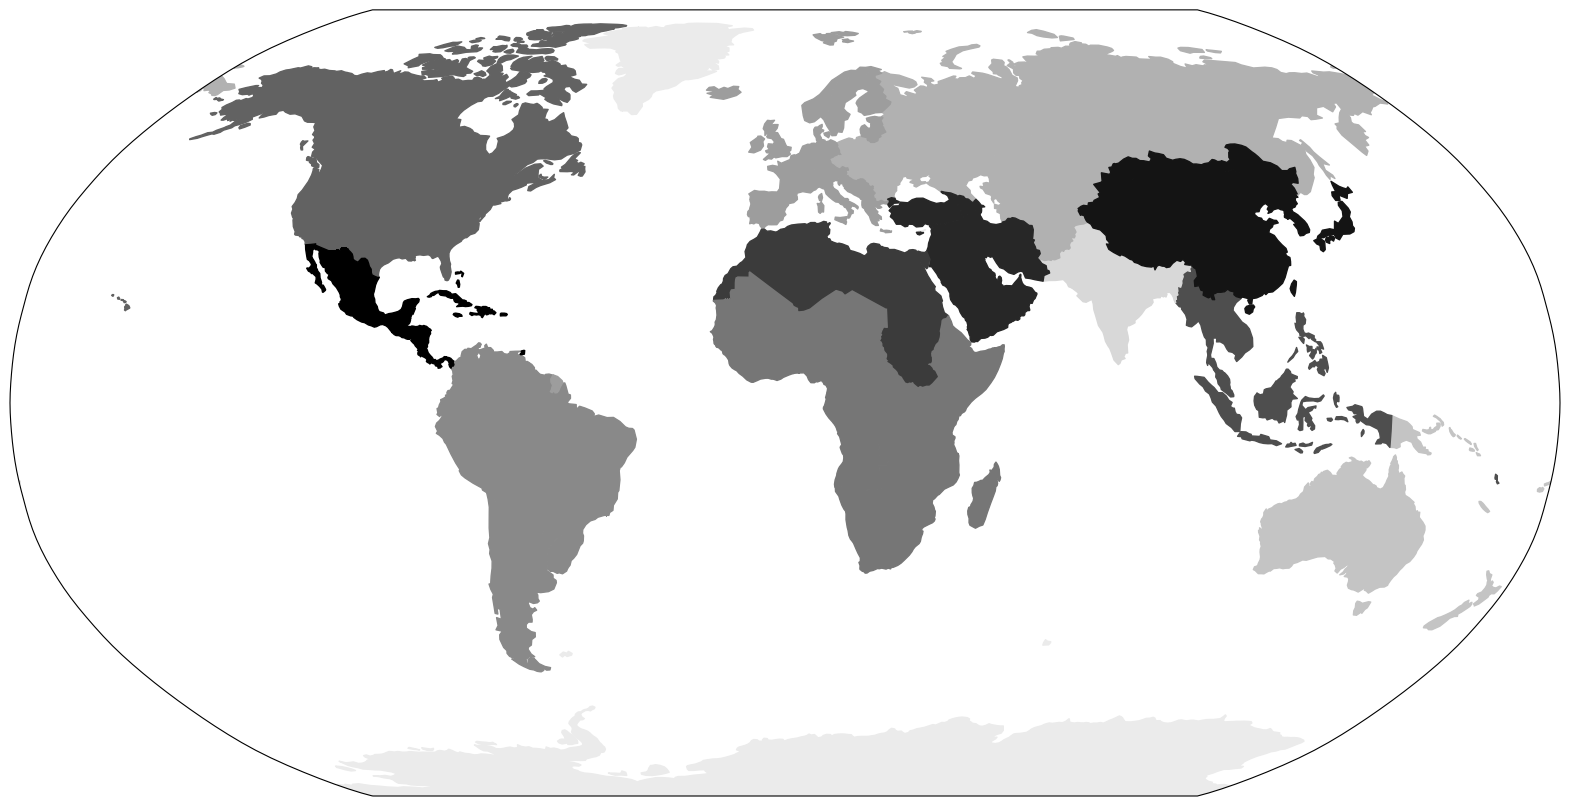

In [4]:
def plot_countries(df, projection, colors):
    plt.figure(figsize=(20, 20))
    ax = plt.axes(projection=projection)
    ax.add_feature(cfeature.OCEAN, facecolor='white')
    #for spine in ax.spines.values():
    #    spine.set_edgecolor(edgecolor)

    shpfilename = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
    reader = shpreader.Reader(shpfilename)
    countries = reader.records()

    values = list(df['Region'].unique())

    for country in countries:
        country_name = country.attributes['NAME']
        if country_name in df['Country'].values:
            region = df[df['Country'] == country_name]['Region'].values[0]
            color = colors[values.index(region)]
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, edgecolor=color, linewidth=1)

    # legend
    #import matplotlib.patches as mpatches
    #handles = []
    #for i, value in enumerate(values):
    #    handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i]))
    #plt.legend(handles, values, loc='lower left', bbox_to_anchor=(0.025, -0.0), fancybox=True, frameon=False, fontsize=5)

    # annotate
    #ax.annotate(annotation, xy=(0, 0), xycoords='figure fraction', xytext=(0.0275, -0.025), textcoords='axes fraction',
    #            horizontalalignment='left', verticalalignment='center', fontsize=4)
    #plt.title(title, fontsize=8)
    plt.show()
    
region_mapping = {
    'central america': ['Mexico', 'Panama', 'Costa Rica', 'Nicaragua', 'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Haiti', 'Dominican Rep.', 'Bahamas', 'Puerto Rico', 'Jamaica', 'Cuba', 'Trinidad and Tobago'],
    'eastern asia': ['North Korea', 'South Korea', 'Mongolia', 'China', 'Taiwan', 'Japan'],
    'middle east': ['Israel', 'Lebanon', 'Palestine', 'Jordan', 'United Arab Emirates', 'Qatar', 'Kuwait', 'Iraq', 'Oman', 'Saudi Arabia', 'Yemen', 'Syria', 'Armenia', 'Turkey', 'Azerbaijan', 'Georgia', 'Cyprus', 'Iran'],
    'northern africa': ['W. Sahara', 'Tunisia', 'Algeria', 'Morocco', 'Egypt', 'Libya', 'Sudan', 'S. Sudan'],
    'south-eastern asia': ['Timor-Leste', 'Vanuatu', 'Cambodia', 'Thailand', 'Laos', 'Myanmar', 'Vietnam', 'Philippines', 'Malaysia', 'Brunei', 'Indonesia'],
    'northern america': ['Canada', 'United States of America'],
    'south africa': ['Dem. Rep. Congo', 'Central African Rep.', 'Congo', 'Gabon', 'Eq. Guinea', 'Chad', 'Tanzania', 'Somalia', 'Kenya', 'Madagascar', 'Djibouti', 'Somaliland', 'Uganda', 'Rwanda', 'Burundi', 'Ethiopia', 'Eritrea', 'Zimbabwe', 'Botswana', 'Namibia', 'Zambia', 'Malawi', 'Mozambique', 'eSwatini', 'Angola', 'South Africa', 'Lesotho', 'Senegal', 'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon', 'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau', 'Liberia', 'Sierra Leone', 'Burkina Faso', 'Gambia'],
    'south america': ['Argentina', 'Chile', 'Uruguay', 'Brazil', 'Bolivia', 'Peru', 'Colombia', 'Venezuela', 'Guyana', 'Suriname', 'Ecuador', 'Paraguay'],
    'western europe': ['Norway', 'Sweden', 'Iceland', 'Ireland', 'United Kingdom', 'Lithuania', 'Latvia', 'Estonia', 'Denmark', 'France', 'Belgium', 'Luxembourg', 'Netherlands', 'Germany', 'Switzerland', 'Finland', 'Portugal', 'Spain', 'Italy', 'Greece', 'Albania', 'Croatia', 'Bosnia and Herz.', 'North Macedonia', 'Serbia', 'Montenegro', 'Kosovo','Austria', 'Slovenia'],
    'eastern europe & central asia': ['Kazakhstan', 'Uzbekistan', 'Afghanistan', 'Tajikistan', 'Kyrgyzstan', 'Turkmenistan', 'Belarus', 'Ukraine', 'Poland',  'Hungary', 'Moldova', 'Romania', 'Bulgaria',  'Czechia', 'Slovakia', 'Russia'],
    'oceania': ['Fiji', 'Papua New Guinea', 'Solomon Is.', 'New Zealand', 'Australia', 'New Caledonia'],
    'south asia': ['India', 'Pakistan', 'Bhutan', 'Nepal', 'Bangladesh'],
    'others': ['Antarctica', 'Fr. S. Antarctic Lands', 'Greenland', 'N. Cyprus', 'Falkland Is.'],
}


data = []
for region, countries in region_mapping.items():
    for country in countries:
        data.append({'Country': country, 'Region': region})

df = pd.DataFrame(data)
projection = ccrs.Robinson()

def generate_gray_colors(n):
    return [(i/n, i/n, i/n) for i in range(n)]
colors = generate_gray_colors(13)
plot_countries(df, projection, colors)

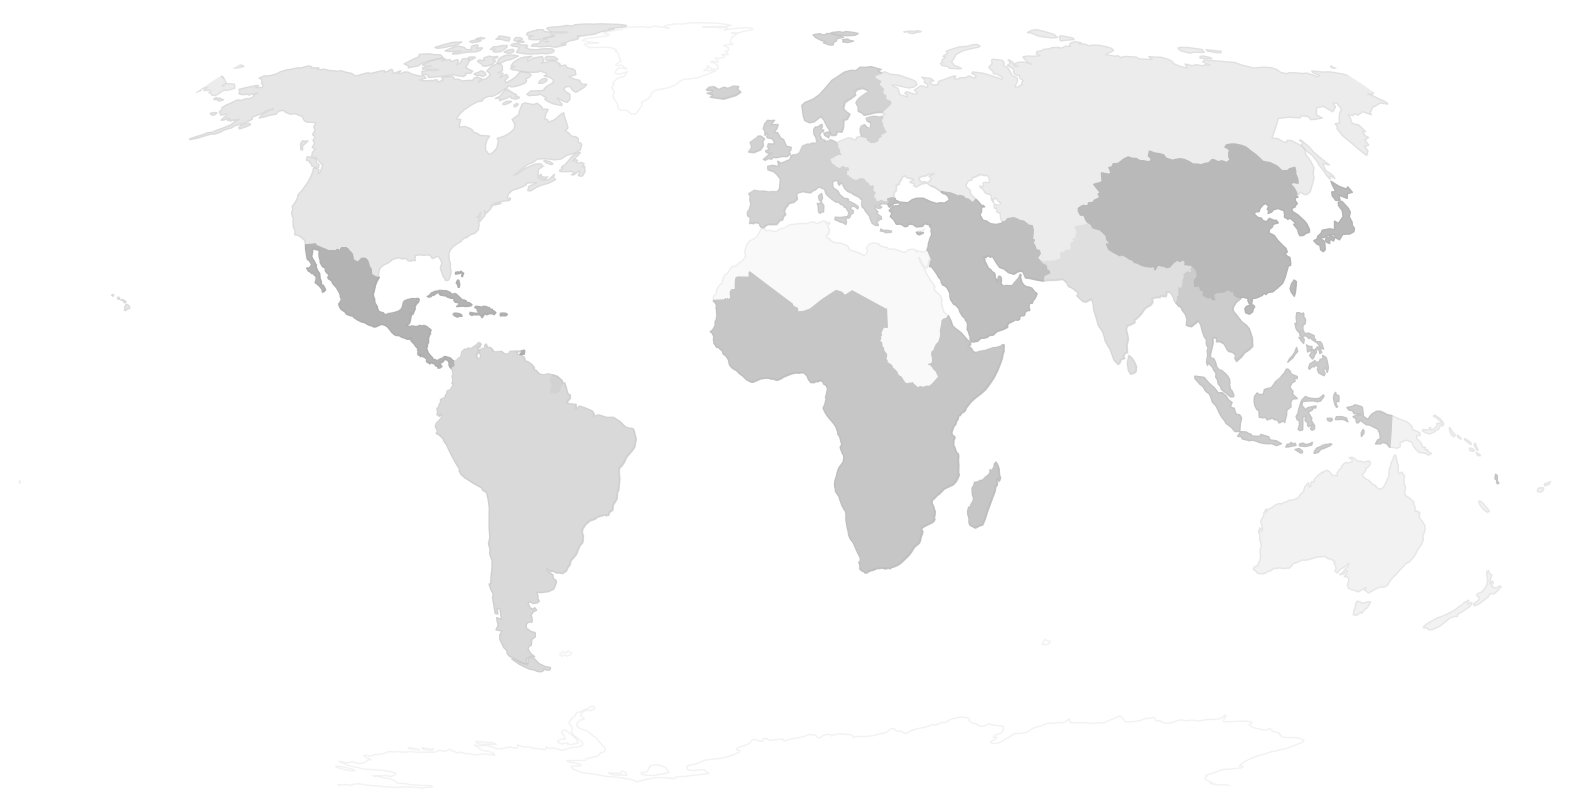

In [39]:
import cartopy.feature as cfeature

def plot_countries(df, projection, colors):
    plt.figure(figsize=(20, 20))
    ax = plt.axes(projection=projection)
    ax.add_feature(cfeature.OCEAN, facecolor='white')
    ax.add_feature(cfeature.COASTLINE, edgecolor='grey', alpha=0.1, zorder=2)  # 海岸線を追加

    shpfilename = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
    reader = shpreader.Reader(shpfilename)
    countries = reader.records()

    values = list(df['Region'].unique())

    for country in countries:
        country_name = country.attributes['NAME']
        if country_name in df['Country'].values:
            region = df[df['Country'] == country_name]['Region'].values[0]
            color = colors[values.index(region)]
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, edgecolor=color, linewidth=1)
            
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['geo'].set_visible(False)

    plt.show()
    
region_mapping = {
    'central america': ['Mexico', 'Panama', 'Costa Rica', 'Nicaragua', 'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Haiti', 'Dominican Rep.', 'Bahamas', 'Puerto Rico', 'Jamaica', 'Cuba', 'Trinidad and Tobago'],
    'eastern asia': ['North Korea', 'South Korea', 'Mongolia', 'China', 'Taiwan', 'Japan'],
    'middle east': ['Israel', 'Lebanon', 'Palestine', 'Jordan', 'United Arab Emirates', 'Qatar', 'Kuwait', 'Iraq', 'Oman', 'Saudi Arabia', 'Yemen', 'Syria', 'Armenia', 'Turkey', 'Azerbaijan', 'Georgia', 'Cyprus', 'Iran'],
    'south africa': ['Dem. Rep. Congo', 'Central African Rep.', 'Congo', 'Gabon', 'Eq. Guinea', 'Chad', 'Tanzania', 'Somalia', 'Kenya', 'Madagascar', 'Djibouti', 'Somaliland', 'Uganda', 'Rwanda', 'Burundi', 'Ethiopia', 'Eritrea', 'Zimbabwe', 'Botswana', 'Namibia', 'Zambia', 'Malawi', 'Mozambique', 'eSwatini', 'Angola', 'South Africa', 'Lesotho', 'Senegal', 'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon', 'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau', 'Liberia', 'Sierra Leone', 'Burkina Faso', 'Gambia'],
    'south-eastern asia': ['Timor-Leste', 'Vanuatu', 'Cambodia', 'Thailand', 'Laos', 'Myanmar', 'Vietnam', 'Philippines', 'Malaysia', 'Brunei', 'Indonesia'],
    'western europe': ['Norway', 'Sweden', 'Iceland', 'Ireland', 'United Kingdom', 'Lithuania', 'Latvia', 'Estonia', 'Denmark', 'France', 'Belgium', 'Luxembourg', 'Netherlands', 'Germany', 'Switzerland', 'Finland', 'Portugal', 'Spain', 'Italy', 'Greece', 'Albania', 'Croatia', 'Bosnia and Herz.', 'North Macedonia', 'Serbia', 'Montenegro', 'Kosovo','Austria', 'Slovenia'],
    'south america': ['Argentina', 'Chile', 'Uruguay', 'Brazil', 'Bolivia', 'Peru', 'Colombia', 'Venezuela', 'Guyana', 'Suriname', 'Ecuador', 'Paraguay'],
    'south asia': ['India', 'Pakistan', 'Bhutan', 'Nepal', 'Bangladesh', 'Sri Lanka'],
    'northern america': ['Canada', 'United States of America'],
    'eastern europe & central asia': ['Kazakhstan', 'Uzbekistan', 'Afghanistan', 'Tajikistan', 'Kyrgyzstan', 'Turkmenistan', 'Belarus', 'Ukraine', 'Poland',  'Hungary', 'Moldova', 'Romania', 'Bulgaria',  'Czechia', 'Slovakia', 'Russia'],
    'oceania': ['Fiji', 'Papua New Guinea', 'Solomon Is.', 'New Zealand', 'Australia', 'New Caledonia'],
    'northern africa': ['W. Sahara', 'Tunisia', 'Algeria', 'Morocco', 'Egypt', 'Libya', 'Sudan', 'S. Sudan'],
    'others': ['Antarctica', 'Fr. S. Antarctic Lands', 'Greenland', 'N. Cyprus', 'Falkland Is.'],
}


data = []
for region, countries in region_mapping.items():
    for country in countries:
        data.append({'Country': country, 'Region': region})

df = pd.DataFrame(data)
projection = ccrs.Robinson()

def generate_gray_colors(n, min_gray=0.7):
    return [(min_gray + (i * (1 - min_gray) / (n - 1)),) * 3 for i in range(n)]

colors = generate_gray_colors(13)
plot_countries(df, projection, colors)

   index   flag      rate        wup         pop  availability          MPCY  \
0      1  False  0.863325  36859.626  31821850.0  1.424091e+10    447.519821   
1      2  False  1.003201  21987.895  22058268.0  4.420798e+09    200.414547   
2      3  False  0.715760  20314.309  14540163.0  1.643563e+10   1130.360505   
3      4  False  1.002057  20136.681  20178100.0  3.006577e+08     14.900200   
4      5  False  0.492121  19659.808   9675000.0  2.057520e+09    212.663566   
5      6  False  0.489232  19312.646   9448362.0  1.272031e+10   1346.297983   
6      7  False  0.470956  18365.262   8649229.0  6.329261e+08     73.177170   
7      8  False  0.783200  18257.413  14299211.0  9.254411e+09    647.197295   
8      9  False  1.006426  16899.015  17007614.0  7.113659e+11  41826.322056   
9     10  False  0.823952  16441.252  13546804.0  2.355427e+09    173.873265   

   potential            region                   country  \
0       93.0      eastern asia                     Japan   

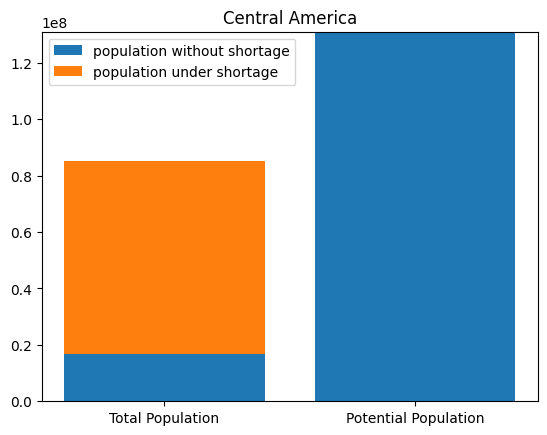

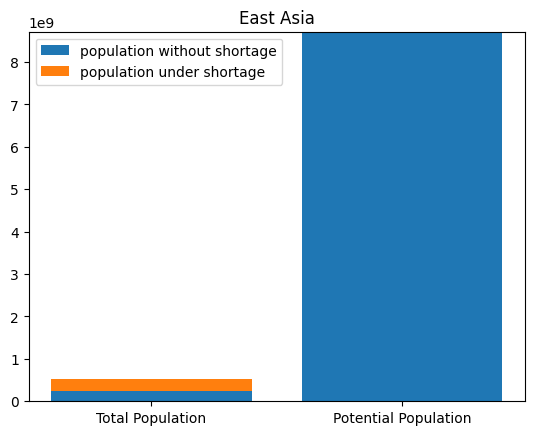

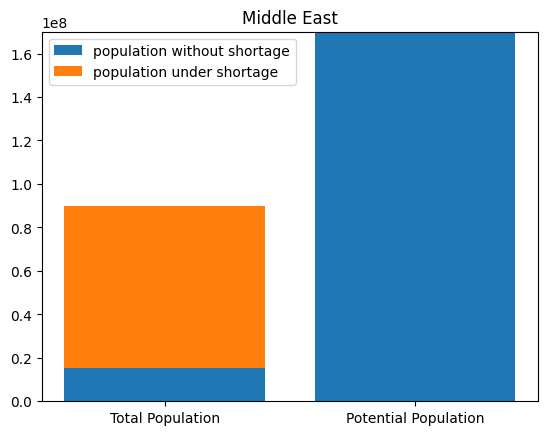

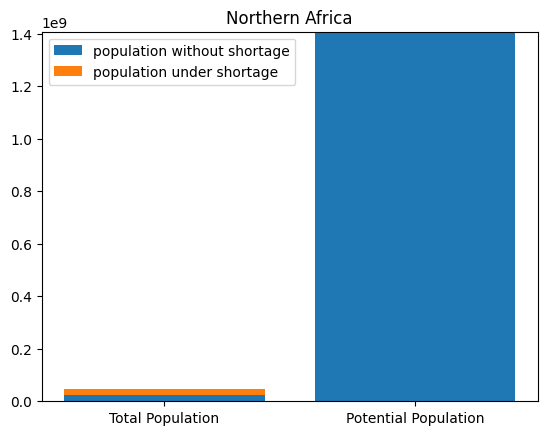

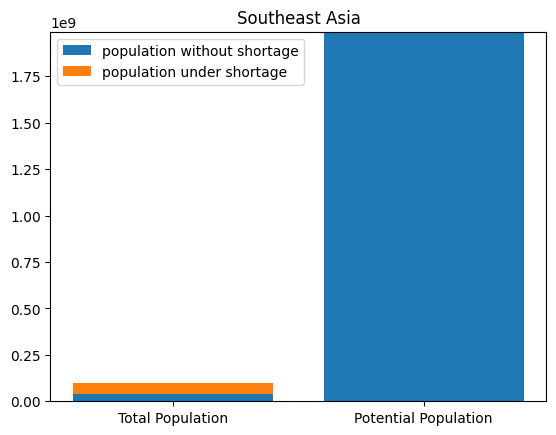

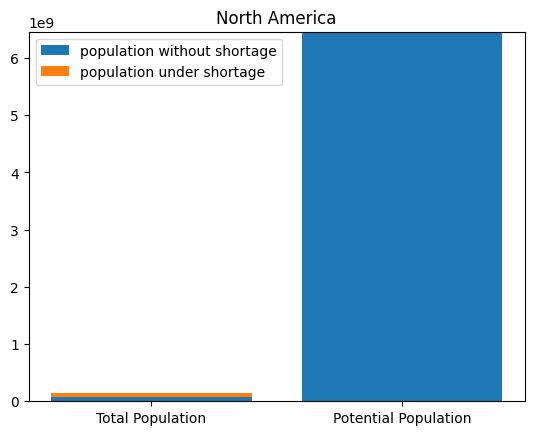

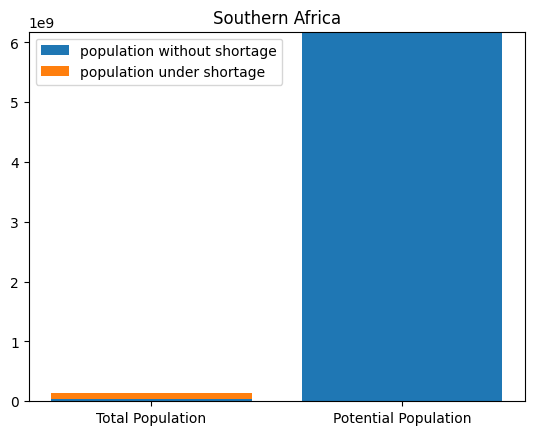

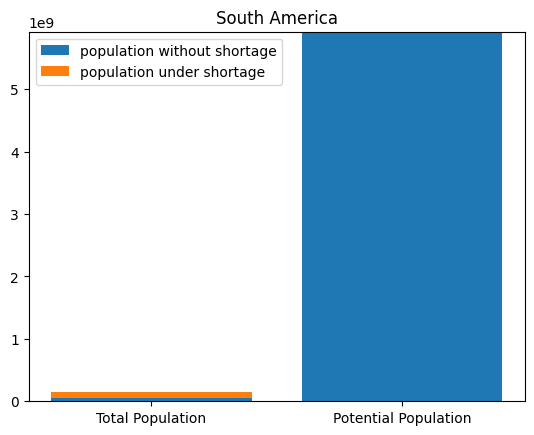

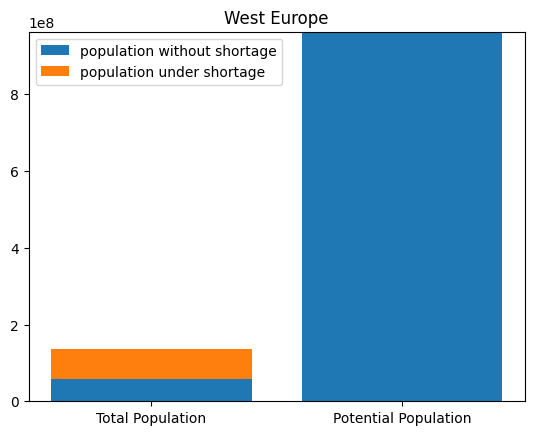

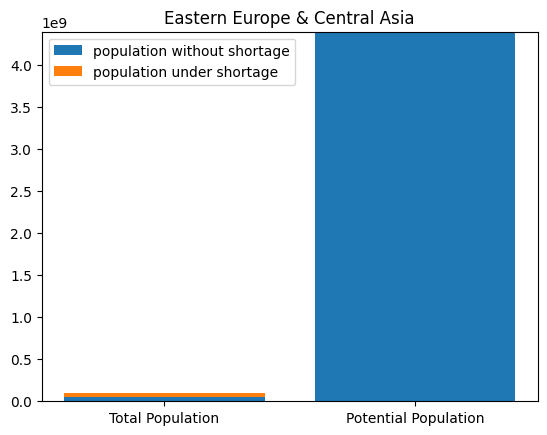

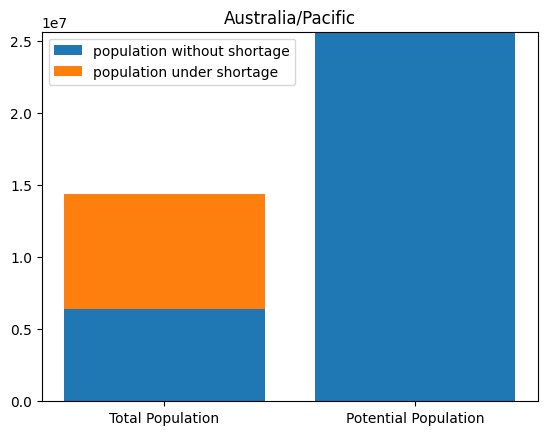

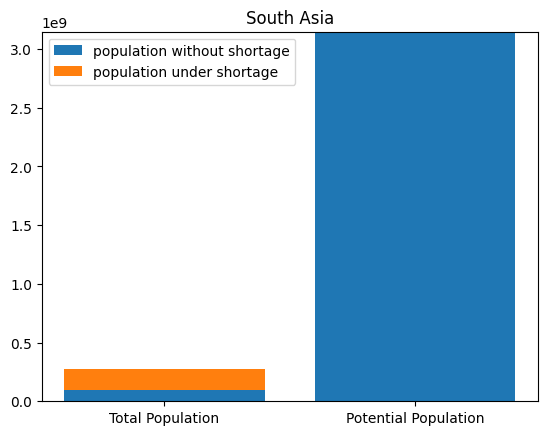

In [6]:
rootdir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/cty_lst_/gpw4'
loadpath = f'{rootdir}/mcy_pop_water_12region.txt'
col_lst = ['index', 'flag', 'rate', 'wup', 'pop', 'availability', 'MPCY', 'potential', 'region', 'country', 'city_name', '12region']
df_loaded = pd.read_csv(loadpath, sep='|', header=None, names=col_lst)
float_lst = ['index', 'rate', 'wup', 'pop', 'availability', 'MPCY', 'potential']
for col in float_lst:
    df_loaded[col] = pd.to_numeric(df_loaded[col], errors='coerce')
print(df_loaded.head(10))

#
region_counts = df_loaded['12region'].value_counts()
pop_sum = df_loaded.groupby('12region')['pop'].sum().reset_index()
estimated_sorted = pop_sum.sort_values(by='pop', ascending=False)
print(estimated_sorted)
total_population_2010 =df_loaded['pop'].sum()
print(f"全都市の合計人口 (million person): {total_population_2010}")

#
filtered_df = df_loaded[df_loaded['MPCY'] < 1000]
stressed_pop = filtered_df.groupby('12region')['pop'].sum().reset_index()
stressed_sorted = stressed_pop.sort_values(by='pop', ascending=False)
print(stressed_sorted)
total_population_2010 =stressed_pop['pop'].sum()
print(f"全都市の合計人口 (million person): {total_population_2010}")

#
ava_df = df_loaded.copy()
ava_df['potential_pop'] = ava_df['availability']/1000
pot_pop = ava_df.groupby('12region')['potential_pop'].sum().reset_index()
pot_sorted = pot_pop.sort_values(by='potential_pop', ascending=False)
print(pot_sorted)
total_population_2010 =pot_pop['potential_pop'].sum()
print(f"全都市の合計人口 (million person): {total_population_2010}")

#
region_lst = ['Central America', 
              'East Asia', 
              'Middle East', 
              'Northern Africa', 
              'Southeast Asia', 
              'North America', 
              'Southern Africa', 
              'South America', 
              'West Europe', 
              'Eastern Europe & Central Asia', 
              'Australia/Pacific', 
              'South Asia']

def tmp_plot(key):
    total = estimated_sorted[estimated_sorted['12region'] == key]['pop'].astype(float)
    stress = stressed_sorted[stressed_sorted['12region'] == key]['pop'].astype(float)
    potential = pot_sorted[pot_sorted['12region'] == key]['potential_pop'].astype(float)
    
    x = ['Total Population', 'Potential Population']
    
    y1 = [total.sum() - stress.sum(), potential.sum()]
    y2 = [stress.sum(), 0]
    
    #y1 = [total.sum() - stress.sum()]
    #y2 = [stress.sum()]
    
    plt.bar(x, y1, label='population without shortage')
    plt.bar(x, y2, bottom=y1, label='population under shortage')
    
    # ラベルの設定
    #plt.xlabel('Category')
    #plt.ylabel('Values')
    plt.title(f'{key}')
    plt.legend()
    
    # グラフの表示
    plt.show()

for key in region_lst:
    tmp_plot(key)

In [7]:
######################################################
# pandas df_updownを読み込み
#####################################################
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
updown_path = f'{h08dir}/wsi/dat/availablewater/updown_availability.txt'
df_updown = pd.read_csv(updown_path, delimiter='|', header=None)
df_updown.columns = df_updown.iloc[0]
df_updown = df_updown[1:].reset_index(drop=True)
df_updown = df_updown.infer_objects()
float_lst = ['rate', 'wup', 'pop', 'ava', 'mpcy', 'potential']
for col in float_lst:
    df_updown[col] = pd.to_numeric(df_updown[col], errors='coerce')
df_updown.head(10)

,index,flag,rate,wup,pop,ava,mpcy,potential,region,country,cityname,12region
0,1,False,0.863325,36859.626,31821850.0,1.379555e+10,433.524552,93.0,eastern asia,Japan,Tokyo,East Asia
1,2,False,1.003201,21987.895,22058268.0,3.580540e+09,162.321909,39.0,southern asia,India,Delhi,South Asia
2,3,False,0.715760,20314.309,14540163.0,1.369470e+10,941.852951,17.0,eastern asia,China,Shanghai,East Asia
3,4,False,1.002057,20136.681,20178100.0,3.006577e+08,14.900200,43.0,central america,Mexico,Ciudad de México (Mexico City),Central America
4,5,False,0.492121,19659.808,9675000.0,2.057520e+09,212.663566,11.0,south america,Brazil,São Paulo,South America
5,6,False,0.489232,19312.646,9448362.0,1.272031e+10,1346.297983,24.0,eastern asia,Japan,Kinki M.M.A. (Osaka),East Asia
6,7,False,0.470956,18365.262,8649229.0,6.329261e+08,73.177170,17.0,northern america,United States of America,New York-Newark,North America
7,8,False,0.783200,18257.413,14299211.0,9.254411e+09,647.197295,12.0,southern asia,India,Mumbai (Bombay),South Asia
8,9,False,1.006426,16899.015,17007614.0,7.059309e+11,41506.758087,24.0,northern africa,Egypt,Al-Qahirah (Cairo),Northern Africa
9,10,False,0.823952,16441.252,13546804.0,1.971522e+09,145.534081,24.0,eastern asia,China,Beijing,East Asia


In [8]:
potential_path = f'{h08dir}/wsi/dat/potential/updown_potential.txt'
df_updown = pd.read_csv(potential_path, delimiter='|', header=None)
df_updown.columns = df_updown.iloc[0]
df_updown = df_updown[1:].reset_index(drop=True)
df_updown = df_updown.infer_objects()
df_updown.head(10)

,index,flag,rate,wup,pop,ava,mpcy,potential,region,country,cityname,12region
0,1,False,0.8633253630951112,36859.626,31821850.0,13795553280.0,433.524552469451,9491682304.0,eastern asia,Japan,Tokyo,East Asia
1,2,False,1.0032005337482284,21987.895,22058268.0,4002339072.0,181.4439407482038,3230178816.0,southern asia,India,Delhi,South Asia
2,3,False,0.715759664776193,20314.309,14540163.0,14700439552.0,1011.0230230568942,10815181824.0,eastern asia,China,Shanghai,East Asia
3,4,False,1.0020568930897795,20136.681,20178100.0,300657725.859375,14.90020001186311,43.0,central america,Mexico,Ciudad de México (Mexico City),Central America
4,5,False,0.4921207775782957,19659.808,9675000.0,2057520000.0,212.66356589147287,2057520000.0,south america,Brazil,São Paulo,South America
5,6,False,0.4892318742858954,19312.646,9448362.0,12720310699.5,1346.2979826026988,12720310699.5,eastern asia,Japan,Kinki M.M.A. (Osaka),East Asia
6,7,False,0.4709559275549676,18365.262,8649229.0,632926103.34375,73.1771702823165,632926103.34375,northern america,United States of America,New York-Newark,North America
7,8,False,0.7832002814418451,18257.413,14299211.0,9254410677.0,647.1972948017901,9254410677.0,southern asia,India,Mumbai (Bombay),South Asia
8,9,False,1.006426350884948,16899.015,17007614.0,707711401984.0,41611.4454375552,34572365824.0,northern africa,Egypt,Al-Qahirah (Cairo),Northern Africa
9,10,False,0.8239520931860906,16441.252,13546804.0,1971521664.0,145.53408051079796,1971521664.0,eastern asia,China,Beijing,East Asia


                         12region           pop
2                       East Asia  5.315165e+08
8                      South Asia  2.753774e+08
7                   South America  1.549972e+08
5                   North America  1.447201e+08
11                    West Europe  1.359223e+08
10                Southern Africa  1.342213e+08
9                  Southeast Asia  9.968082e+07
3   Eastern Europe & Central Asia  9.282768e+07
4                     Middle East  8.969898e+07
1                 Central America  8.524293e+07
6                 Northern Africa  4.538879e+07
0               Australia/Pacific  1.441377e+07
全都市の合計人口 (person): 1804007889.578125
                         12region           pop
2                       East Asia  2.996921e+08
8                      South Asia  1.825449e+08
7                   South America  1.084275e+08
10                Southern Africa  9.256822e+07
5                   North America  7.824450e+07
11                    West Europe  7.747021e+07
4  

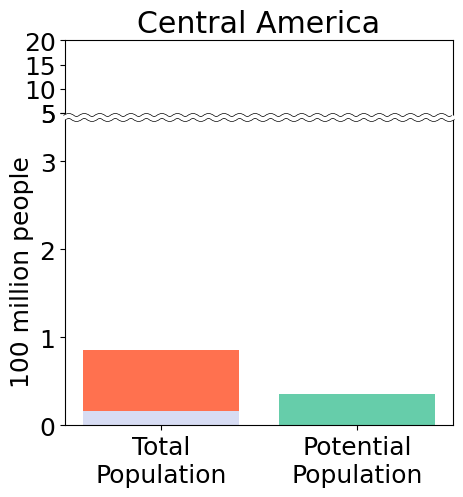

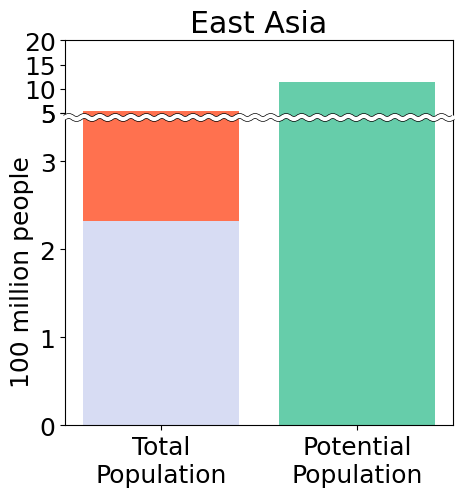

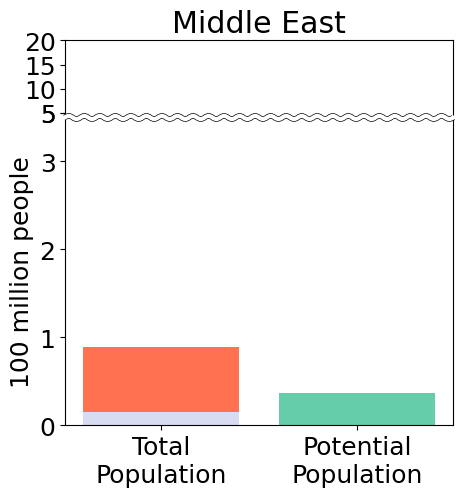

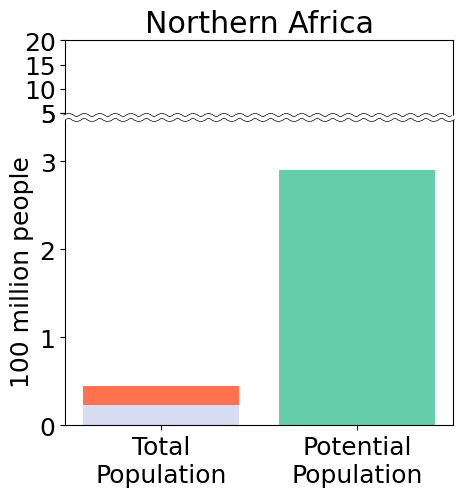

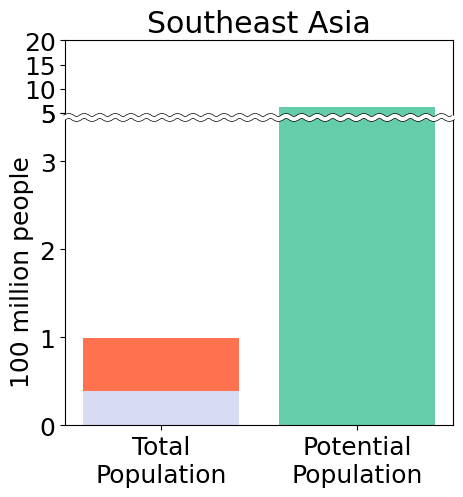

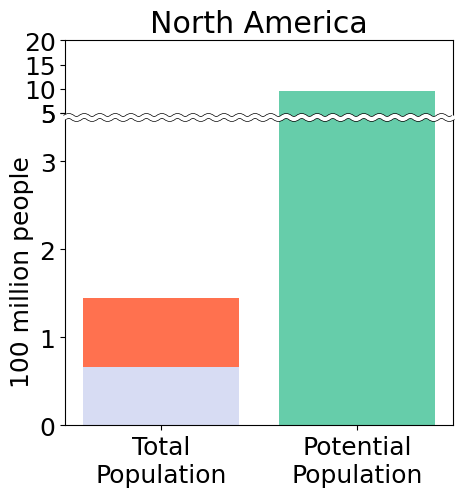

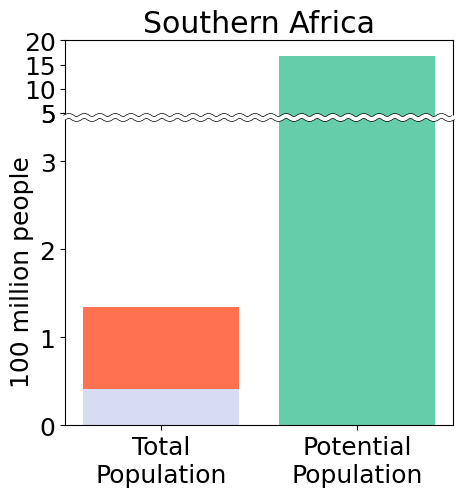

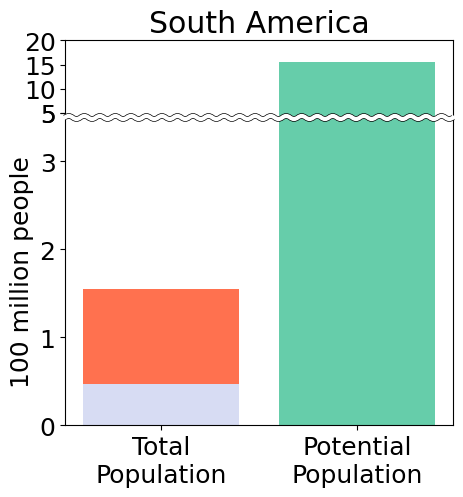

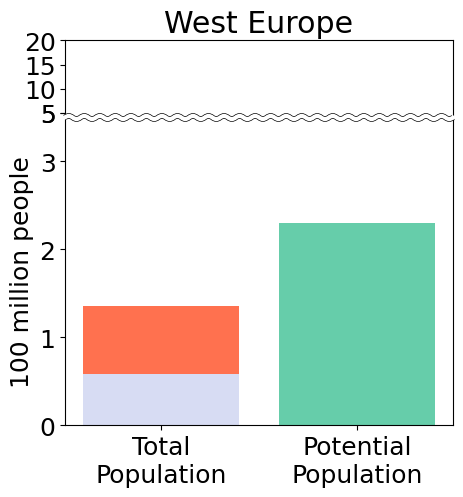

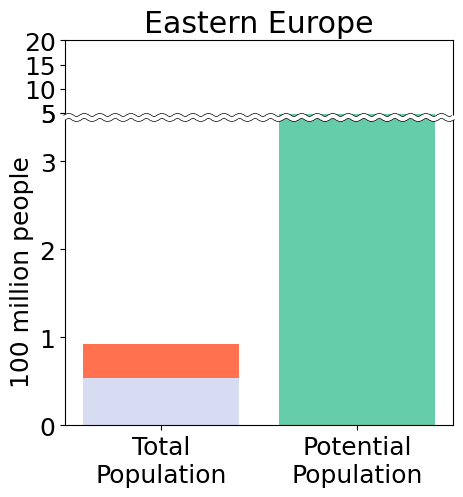

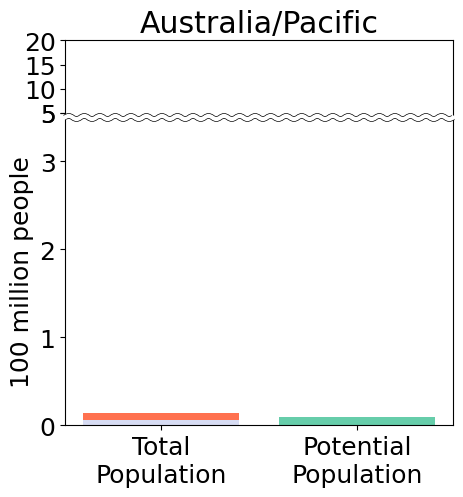

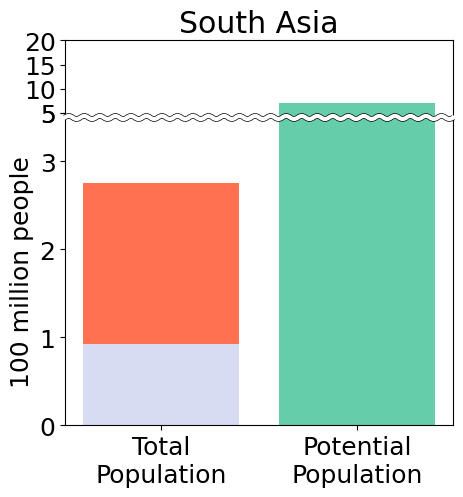

In [9]:
import matplotlib.patches as mpatches
from matplotlib.path import Path

######################################################
# pandas dfを保存
#####################################################
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
updown_path = f'{h08dir}/wsi/dat/availablewater/updown_availability.txt'
potential_path = f'{h08dir}/wsi/dat/potential/updown_potential.txt'
load_path = potential_path

df_updown = pd.read_csv(load_path, delimiter='|', header=None)
df_updown.columns = df_updown.iloc[0]
df_updown = df_updown[1:].reset_index(drop=True)
df_updown = df_updown.infer_objects()
float_lst = ['rate', 'wup', 'pop', 'ava', 'mpcy', 'potential']
for col in float_lst:
    df_updown[col] = pd.to_numeric(df_updown[col], errors='coerce')

# total population
region_counts = df_updown['12region'].value_counts()
pop_sum = df_updown.groupby('12region')['pop'].sum().reset_index()
estimated_sorted = pop_sum.sort_values(by='pop', ascending=False)
print(estimated_sorted)
total_population_2010 =df_updown['pop'].sum()
print(f"全都市の合計人口 (person): {total_population_2010}")

# stressed population
filtered_df = df_updown[df_updown['mpcy'] < 1000]
stressed_pop = filtered_df.groupby('12region')['pop'].sum().reset_index()
stressed_sorted = stressed_pop.sort_values(by='pop', ascending=False)
print(stressed_sorted)
total_population_2010 =stressed_pop['pop'].sum()
print(f"全都市の合計人口 (person): {total_population_2010}")

# potential
ava_df = df_updown.copy()
ava_df['potential_pop'] = ava_df['potential']/2500
pot_pop = ava_df.groupby('12region')['potential_pop'].sum().reset_index()
pot_sorted = pot_pop.sort_values(by='potential_pop', ascending=False)
print(pot_sorted)
total_population_2010 =pot_pop['potential_pop'].sum()
print(f"全都市の合計人口 (person): {total_population_2010}")

region_lst = ['Central America', 
              'East Asia', 
              'Middle East', 
              'Northern Africa', 
              'Southeast Asia', 
              'North America', 
              'Southern Africa', 
              'South America', 
              'West Europe', 
              'Eastern Europe & Central Asia', 
              'Australia/Pacific', 
              'South Asia']

def bar_plot(key):
    total = estimated_sorted[estimated_sorted['12region'] == key]['pop'].astype(float)
    stress = stressed_sorted[stressed_sorted['12region'] == key]['pop'].astype(float)
    potential = pot_sorted[pot_sorted['12region'] == key]['potential_pop'].astype(float)
    
    # Categories and positions
    categories = ['Total\nPopulation', 'Potential\nPopulation']
    positions1 = [0]  # Position for the first set of bars
    positions2 = [1]  # Position for the second set of bars
    
    # Values for the bars
    y1 = [total.sum() - stress.sum()]
    y2 = [stress.sum()]
    y3 = [potential.sum()]
    
    y1 = [i/1e8 for i in y1]
    y2 = [i/1e8 for i in y2]
    y3 = [i/1e8 for i in y3]
    
    plt.rcParams.update({'font.size': 18})
    fig, ax = plt.subplots(nrows=2, figsize=(5,5), dpi=100, sharex='col',
                           gridspec_kw={'height_ratios': (1,4)} )
    
    # Plot the bars
    # 下段
    #ax[1].bar(positions1, y1, label='Population without shortage', color='#e2e5f3')
    ax[1].bar(positions1, y1, label='Population without shortage', color='#d7dcf3')
    ax[1].bar(positions1, y2, bottom=y1, label='Population under shortage', color='#ff714f')
    #ax[1].bar(positions2, y3, label='Potential Population', color='#64f164')
    ax[1].bar(positions2, y3, label='Potential Population', color='mediumaquamarine')
    # 上段
    #ax[0].bar(positions1, y1, label='Population without shortage', color='#e2e5f3')
    ax[0].bar(positions1, y1, label='Population without shortage', color='#d7dcf3')
    ax[0].bar(positions1, y2, bottom=y1, label='Population under shortage', color='#ff714f')
    #ax[0].bar(positions2, y3, color='#64f164')
    ax[0].bar(positions2, y3, label='Potential Population', color='mediumaquamarine')
    
    fig.subplots_adjust(hspace=0.0)  
    # Set the x-ticks and labels
    ax[1].set_xticks(positions1 + positions2, categories)
    ax[1].set_ylim(0, 3.5)  # 区間幅 400
    ax[1].set_yticks((0, 1, 2, 3))
    
    # 上段サブプロット
    ax[0].set_ylim(4,20)  # 区間幅 200
    ax[0].set_yticks((5, 5, 10, 15, 20))
    
    # 下段のプロット領域上辺を非表示
    ax[1].spines['top'].set_visible(False)
    
    # 上段のプロット領域底辺を非表示、X軸の目盛とラベルを非表示
    ax[0].spines['bottom'].set_visible(False)
    ax[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False) 
    d1 = 0.001 # X軸のはみだし量
    d2 = 0.01 # ニョロ波の高さ
    wn = 101   # ニョロ波の数（奇数値を指定）
    
    pp = (0,d2,0,-d2)
    px = np.linspace(-d1,1+d1,wn)
    py = np.array([1+pp[i%4] for i in range(0,wn)])
    p = Path(list(zip(px,py)), [Path.MOVETO]+[Path.CURVE3]*(wn-1))
    
    line1 = mpatches.PathPatch(p, lw=4, edgecolor='black',
                              facecolor='None', clip_on=False,
                              transform=ax[1].transAxes, zorder=10)
    
    line2 = mpatches.PathPatch(p,lw=3, edgecolor='white',
                               facecolor='None', clip_on=False,
                               transform=ax[1].transAxes, zorder=10,
                               capstyle='round')
    
    a = ax[1].add_patch(line1)
    a = ax[1].add_patch(line2)
    
    # Labels and title
    #plt.xlabel('Category')
    ax[1].set_ylabel('100 million people')
    if key == 'Eastern Europe & Central Asia':
        key = 'Eastern Europe'
    elif key == 'Eastern Europe & Central Asia':
        key = 'Oceania'
    ax[0].set_title(f'{key}')
    #plt.legend()
    
    # Show the plot
    plt.show()

for key in region_lst:
    bar_plot(key)

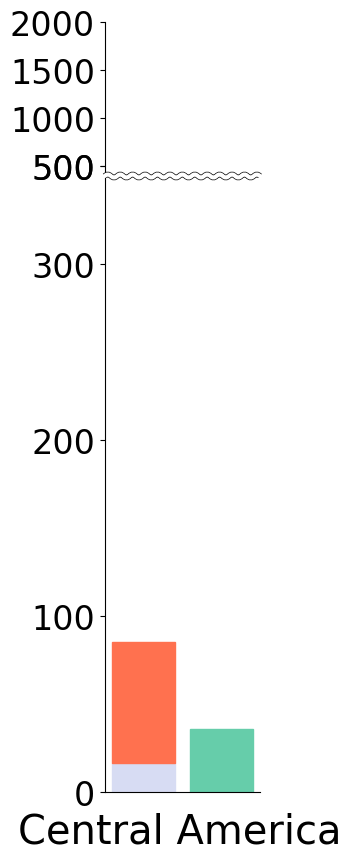

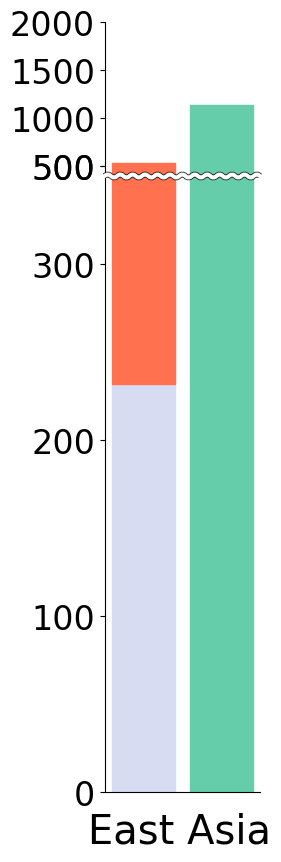

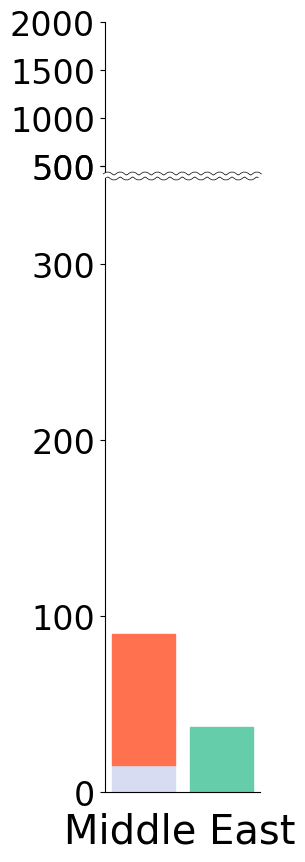

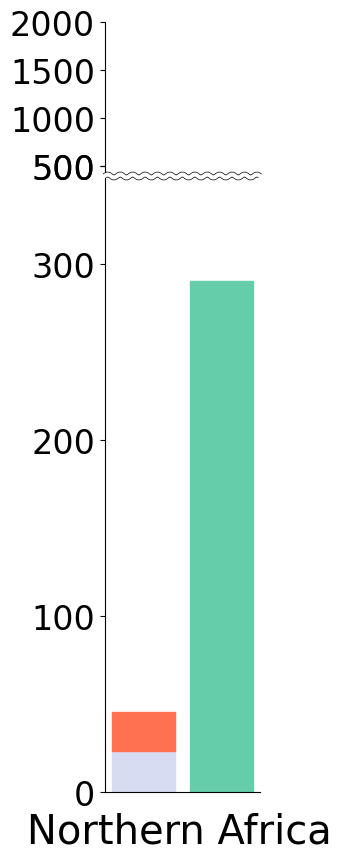

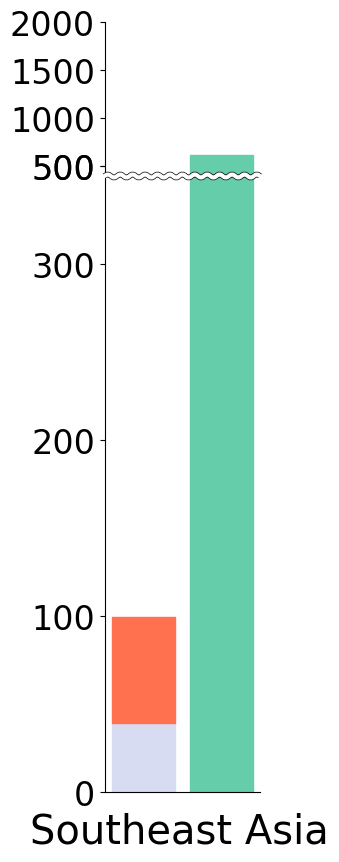

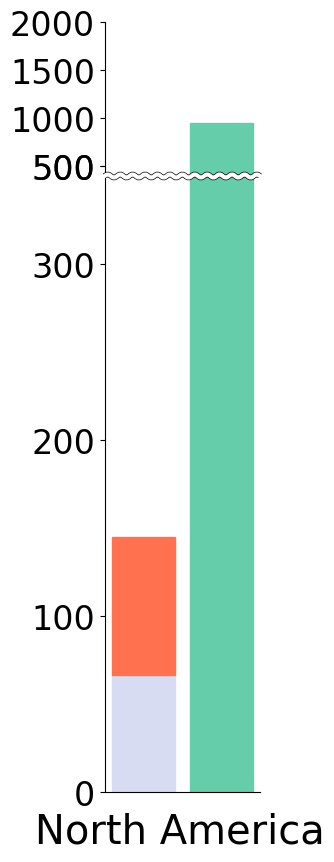

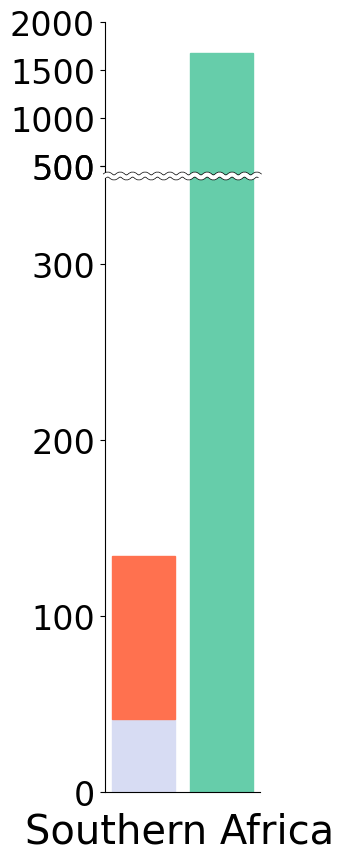

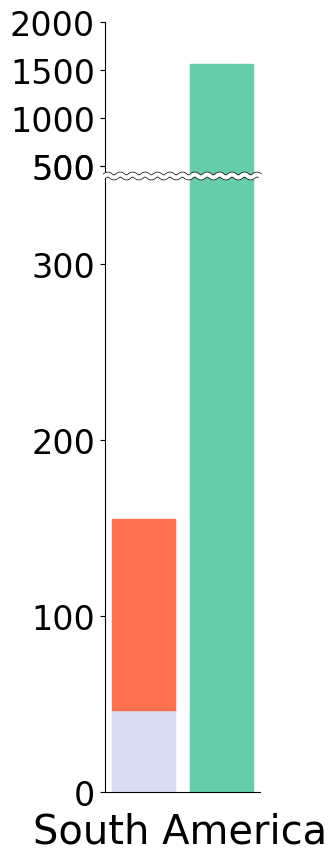

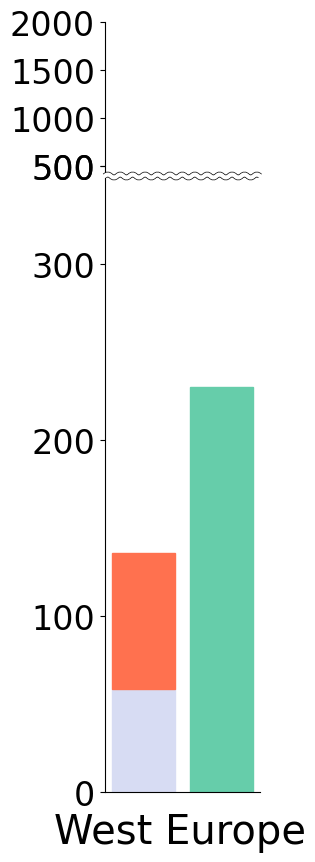

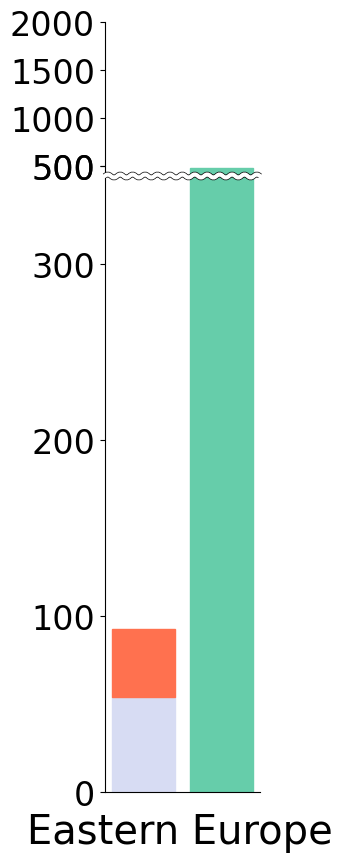

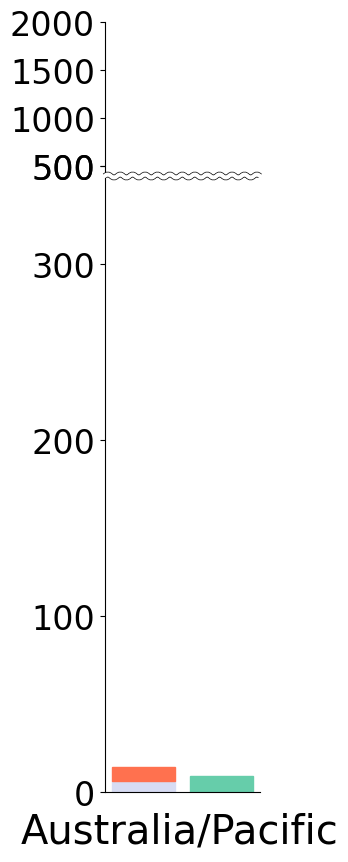

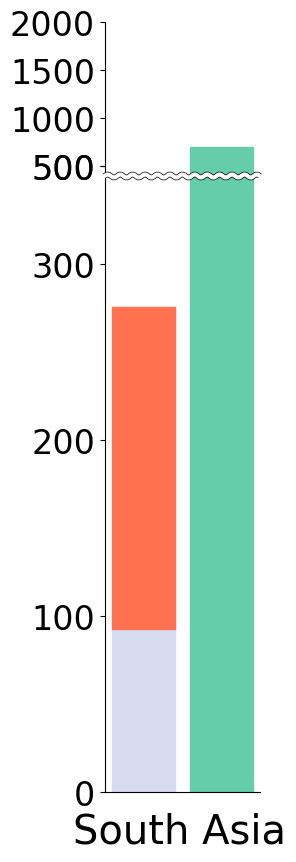

In [55]:
import matplotlib.patches as mpatches
from matplotlib.path import Path

######################################################
# pandas dfを保存
#####################################################
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
updown_path = f'{h08dir}/wsi/dat/availablewater/updown_availability.txt'
potential_path = f'{h08dir}/wsi/dat/potential/updown_potential.txt'
load_path = potential_path

df_updown = pd.read_csv(load_path, delimiter='|', header=None)
df_updown.columns = df_updown.iloc[0]
df_updown = df_updown[1:].reset_index(drop=True)
df_updown = df_updown.infer_objects()
float_lst = ['rate', 'wup', 'pop', 'ava', 'mpcy', 'potential']
for col in float_lst:
    df_updown[col] = pd.to_numeric(df_updown[col], errors='coerce')

# total population
region_counts = df_updown['12region'].value_counts()
pop_sum = df_updown.groupby('12region')['pop'].sum().reset_index()
estimated_sorted = pop_sum.sort_values(by='pop', ascending=False)

# stressed population
filtered_df = df_updown[df_updown['mpcy'] < 1000]
stressed_pop = filtered_df.groupby('12region')['pop'].sum().reset_index()
stressed_sorted = stressed_pop.sort_values(by='pop', ascending=False)

# potential
ava_df = df_updown.copy()
ava_df['potential_pop'] = ava_df['potential']/2500
pot_pop = ava_df.groupby('12region')['potential_pop'].sum().reset_index()
pot_sorted = pot_pop.sort_values(by='potential_pop', ascending=False)

region_lst = ['Central America', 
              'East Asia', 
              'Middle East', 
              'Northern Africa', 
              'Southeast Asia', 
              'North America', 
              'Southern Africa', 
              'South America', 
              'West Europe', 
              'Eastern Europe & Central Asia', 
              'Australia/Pacific', 
              'South Asia']

def bar_plot(key):
    total = estimated_sorted[estimated_sorted['12region'] == key]['pop'].astype(float)
    stress = stressed_sorted[stressed_sorted['12region'] == key]['pop'].astype(float)
    potential = pot_sorted[pot_sorted['12region'] == key]['potential_pop'].astype(float)
    
    # Categories and positions
    categories = ['Total\nPopulation', 'Potential\nPopulation']
    positions1 = [0]  # Position for the first set of bars
    positions2 = [1]  # Position for the second set of bars
    
    # Values for the bars
    y1 = [total.sum() - stress.sum()]
    y2 = [stress.sum()]
    y3 = [potential.sum()]
    
    y1 = [i/1e6 for i in y1]
    y2 = [i/1e6 for i in y2]
    y3 = [i/1e6 for i in y3]
    
    plt.rcParams.update({'font.size': 24})
    fig, ax = plt.subplots(nrows=2, figsize=(2,10), dpi=100, sharex='col',
                           gridspec_kw={'height_ratios': (1,4)} )

    width=0.8
    nonshr_color = '#d7dcf3'
    shr_color = '#ff714f'
    pot_color = 'mediumaquamarine'
    
    nonshr_facecolor='none'
    shr_facecolor='none'
    pot_facecolor='none'
    
    nonshr_facecolor = '#d7dcf3'
    shr_facecolor = '#ff714f'
    pot_facecolor = 'mediumaquamarine'
    
    # Plot the bars
    # 下段
    ax[1].bar(positions1, y1, width=width, edgecolor=nonshr_color, facecolor=nonshr_facecolor, label='Population without shortage')
    ax[1].bar(positions1, y2, bottom=y1, width=width, edgecolor=shr_color, facecolor=shr_facecolor, label='Population under shortage')
    ax[1].bar(positions2, y3, width=width, edgecolor=pot_color, facecolor=pot_facecolor, label='Potential Population')
    # 上段
    ax[0].bar(positions1, y1, width=width, edgecolor=nonshr_color, facecolor=nonshr_facecolor, label='Population without shortage')
    ax[0].bar(positions1, y2, bottom=y1, width=width, edgecolor=shr_color, facecolor=shr_facecolor, label='Population under shortage')
    ax[0].bar(positions2, y3, width=width, edgecolor=pot_color, facecolor=pot_facecolor, label='Potential Population')
    
    fig.subplots_adjust(hspace=0.0)  
    # Set the x-ticks and labels
    ax[1].set_xticks(positions1 + positions2, categories)
    ax[1].set_xticks([])
    ax[1].set_ylim(0, 350)  # 区間幅 400
    ax[1].set_yticks((0, 100, 200, 300))
    
    # 上段サブプロット
    ax[0].set_ylim(400,2000)  # 区間幅 200
    ax[0].set_yticks((500, 500, 1000, 1500, 2000))
    
    # 下段のプロット領域上辺を非表示
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    
    # 上段のプロット領域底辺を非表示、X軸の目盛とラベルを非表示
    ax[0].spines['bottom'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False) 
    d1 = 0.001 # X軸のはみだし量
    d2 = 0.005 # ニョロ波の高さ
    wn = 51   # ニョロ波の数（奇数値を指定）
    
    pp = (0,d2,0,-d2)
    px = np.linspace(-d1,1+d1,wn)
    py = np.array([1+pp[i%4] for i in range(0,wn)])
    p = Path(list(zip(px,py)), [Path.MOVETO]+[Path.CURVE3]*(wn-1))
    
    line1 = mpatches.PathPatch(p, lw=4, edgecolor='black',
                              facecolor='None', clip_on=False,
                              transform=ax[1].transAxes, zorder=10)
    
    line2 = mpatches.PathPatch(p,lw=3, edgecolor='white',
                               facecolor='None', clip_on=False,
                               transform=ax[1].transAxes, zorder=10,
                               capstyle='round')
    
    a = ax[1].add_patch(line1)
    a = ax[1].add_patch(line2)
    
    # Labels and title
    #plt.xlabel('Category')
    #ax[0].set_ylabel('millions')
    #ax[0].yaxis.set_label_coords(0.2, 0.65) 
    if key == 'Eastern Europe & Central Asia':
        key = 'Eastern Europe'
    elif key == 'Eastern Europe & Central Asia':
        key = 'Oceania'
    #ax[0].set_title(f'{key}', pad=20)
    fig.suptitle(f'{key}', y=0.09)
    #plt.legend()
    
    # Show the plot
    plt.show()

for key in region_lst:
    bar_plot(key)

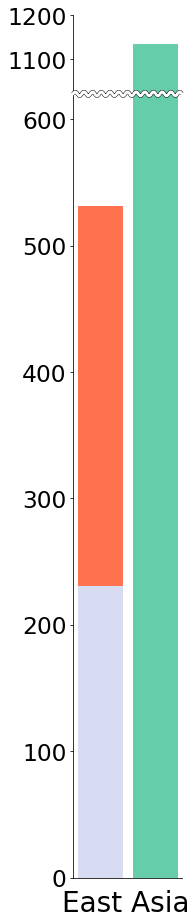

In [84]:
import matplotlib.patches as mpatches
from matplotlib.path import Path

######################################################
# pandas dfを保存
#####################################################
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
updown_path = f'{h08dir}/wsi/dat/availablewater/updown_availability.txt'
potential_path = f'{h08dir}/wsi/dat/potential/updown_potential.txt'
load_path = potential_path

df_updown = pd.read_csv(load_path, delimiter='|', header=None)
df_updown.columns = df_updown.iloc[0]
df_updown = df_updown[1:].reset_index(drop=True)
df_updown = df_updown.infer_objects()
float_lst = ['rate', 'wup', 'pop', 'ava', 'mpcy', 'potential']
for col in float_lst:
    df_updown[col] = pd.to_numeric(df_updown[col], errors='coerce')

# total population
region_counts = df_updown['12region'].value_counts()
pop_sum = df_updown.groupby('12region')['pop'].sum().reset_index()
estimated_sorted = pop_sum.sort_values(by='pop', ascending=False)

# stressed population
filtered_df = df_updown[df_updown['mpcy'] < 1000]
stressed_pop = filtered_df.groupby('12region')['pop'].sum().reset_index()
stressed_sorted = stressed_pop.sort_values(by='pop', ascending=False)

# potential
ava_df = df_updown.copy()
ava_df['potential_pop'] = ava_df['potential']/2500
pot_pop = ava_df.groupby('12region')['potential_pop'].sum().reset_index()
pot_sorted = pot_pop.sort_values(by='potential_pop', ascending=False)

region_lst = ['Central America', 
              'East Asia', 
              'Middle East', 
              'Northern Africa', 
              'Southeast Asia', 
              'North America', 
              'Southern Africa', 
              'South America', 
              'West Europe', 
              'Eastern Europe & Central Asia', 
              'Australia/Pacific', 
              'South Asia']

def bar_plot(key):
    plt.rcParams.update({'font.size': 24})
    fig, ax = plt.subplots(nrows=2, figsize=(2,16), dpi=70, sharex='col',
                           gridspec_kw={'height_ratios': (1,10)} )
    
    total = estimated_sorted[estimated_sorted['12region'] == key]['pop'].astype(float)
    stress = stressed_sorted[stressed_sorted['12region'] == key]['pop'].astype(float)
    potential = pot_sorted[pot_sorted['12region'] == key]['potential_pop'].astype(float)
    
    # Categories and positions
    categories = ['Total\nPopulation', 'Potential\nPopulation']
    positions1 = [0]  # Position for the first set of bars
    positions2 = [1]  # Position for the second set of bars
    
    # Values for the bars
    y1 = [total.sum() - stress.sum()]
    y2 = [stress.sum()]
    y3 = [potential.sum()]
    
    y1 = [i/1e6 for i in y1]
    y2 = [i/1e6 for i in y2]
    y3 = [i/1e6 for i in y3]
    
    width=0.8
    nonshr_color = '#d7dcf3'
    shr_color = '#ff714f'
    pot_color = 'mediumaquamarine'
    
    nonshr_facecolor='none'
    shr_facecolor='none'
    pot_facecolor='none'
    
    nonshr_facecolor = '#d7dcf3'
    shr_facecolor = '#ff714f'
    pot_facecolor = 'mediumaquamarine'
    
    # Plot the bars
    # 下段
    ax[1].bar(positions1, y1, width=width, edgecolor=nonshr_color, facecolor=nonshr_facecolor, label='Population without shortage')
    ax[1].bar(positions1, y2, bottom=y1, width=width, edgecolor=shr_color, facecolor=shr_facecolor, label='Population under shortage')
    ax[1].bar(positions2, y3, width=width, edgecolor=pot_color, facecolor=pot_facecolor, label='Potential Population')
    # 上段
    ax[0].bar(positions1, y1, width=width, edgecolor=nonshr_color, facecolor=nonshr_facecolor, label='Population without shortage')
    ax[0].bar(positions1, y2, bottom=y1, width=width, edgecolor=shr_color, facecolor=shr_facecolor, label='Population under shortage')
    ax[0].bar(positions2, y3, width=width, edgecolor=pot_color, facecolor=pot_facecolor, label='Potential Population')
    
    fig.subplots_adjust(hspace=0.0)  
    # Set the x-ticks and labels
    ax[1].set_xticks(positions1 + positions2, categories)
    ax[1].set_xticks([])
    ax[1].set_ylim(0, 620)  # 区間幅 400
    ax[1].set_yticks((0, 100, 200, 300, 400, 500, 600))
    
    # 上段サブプロット
    ax[0].set_ylim(1020,1200)  # 区間幅 200
    ax[0].set_yticks((1100, 1200))
    
    # 下段のプロット領域上辺を非表示
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    
    # 上段のプロット領域底辺を非表示、X軸の目盛とラベルを非表示
    ax[0].spines['bottom'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False) 
    d1 = 0.001 # X軸のはみだし量
    d2 = 0.005 # ニョロ波の高さ
    wn = 51   # ニョロ波の数（奇数値を指定）
    
    pp = (0,d2,0,-d2)
    px = np.linspace(-d1,1+d1,wn)
    py = np.array([1+pp[i%4] for i in range(0,wn)])
    p = Path(list(zip(px,py)), [Path.MOVETO]+[Path.CURVE3]*(wn-1))
    
    line1 = mpatches.PathPatch(p, lw=4, edgecolor='black',
                              facecolor='None', clip_on=False,
                              transform=ax[1].transAxes, zorder=10)
    
    line2 = mpatches.PathPatch(p,lw=3, edgecolor='white',
                               facecolor='None', clip_on=False,
                               transform=ax[1].transAxes, zorder=10,
                               capstyle='round')
    
    a = ax[1].add_patch(line1)
    a = ax[1].add_patch(line2)
    
    # Labels and title
    #plt.xlabel('Category')
    #ax[0].set_ylabel('millions')
    #ax[0].yaxis.set_label_coords(0.2, 0.65) 
    if key == 'Eastern Europe & Central Asia':
        key = 'Eastern Europe'
    elif key == 'Eastern Europe & Central Asia':
        key = 'Oceania'
    #ax[0].set_title(f'{key}', pad=20)
    fig.suptitle(f'{key}', y=0.10)
    #plt.legend()
    
    # Show the plot
    plt.show()

bar_plot('East Asia')

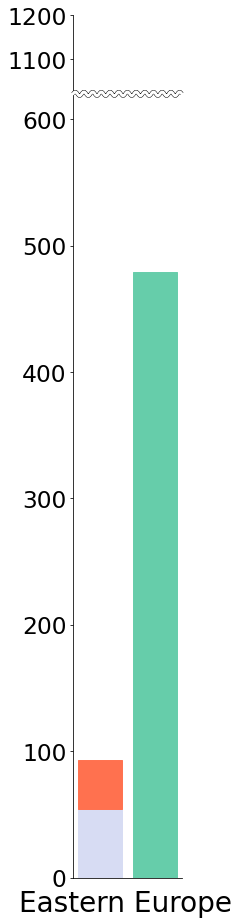

In [85]:
import matplotlib.patches as mpatches
from matplotlib.path import Path

######################################################
# pandas dfを保存
#####################################################
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
updown_path = f'{h08dir}/wsi/dat/availablewater/updown_availability.txt'
potential_path = f'{h08dir}/wsi/dat/potential/updown_potential.txt'
load_path = potential_path

df_updown = pd.read_csv(load_path, delimiter='|', header=None)
df_updown.columns = df_updown.iloc[0]
df_updown = df_updown[1:].reset_index(drop=True)
df_updown = df_updown.infer_objects()
float_lst = ['rate', 'wup', 'pop', 'ava', 'mpcy', 'potential']
for col in float_lst:
    df_updown[col] = pd.to_numeric(df_updown[col], errors='coerce')

# total population
region_counts = df_updown['12region'].value_counts()
pop_sum = df_updown.groupby('12region')['pop'].sum().reset_index()
estimated_sorted = pop_sum.sort_values(by='pop', ascending=False)

# stressed population
filtered_df = df_updown[df_updown['mpcy'] < 1000]
stressed_pop = filtered_df.groupby('12region')['pop'].sum().reset_index()
stressed_sorted = stressed_pop.sort_values(by='pop', ascending=False)

# potential
ava_df = df_updown.copy()
ava_df['potential_pop'] = ava_df['potential']/2500
pot_pop = ava_df.groupby('12region')['potential_pop'].sum().reset_index()
pot_sorted = pot_pop.sort_values(by='potential_pop', ascending=False)

region_lst = ['Central America', 
              'East Asia', 
              'Middle East', 
              'Northern Africa', 
              'Southeast Asia', 
              'North America', 
              'Southern Africa', 
              'South America', 
              'West Europe', 
              'Eastern Europe & Central Asia', 
              'Australia/Pacific', 
              'South Asia']

def bar_plot(key):
    plt.rcParams.update({'font.size': 24})
    fig, ax = plt.subplots(nrows=2, figsize=(2,16), dpi=70, sharex='col',
                           gridspec_kw={'height_ratios': (1,10)} )
    
    total = estimated_sorted[estimated_sorted['12region'] == key]['pop'].astype(float)
    stress = stressed_sorted[stressed_sorted['12region'] == key]['pop'].astype(float)
    potential = pot_sorted[pot_sorted['12region'] == key]['potential_pop'].astype(float)
    
    # Categories and positions
    categories = ['Total\nPopulation', 'Potential\nPopulation']
    positions1 = [0]  # Position for the first set of bars
    positions2 = [1]  # Position for the second set of bars
    
    # Values for the bars
    y1 = [total.sum() - stress.sum()]
    y2 = [stress.sum()]
    y3 = [potential.sum()]
    
    y1 = [i/1e6 for i in y1]
    y2 = [i/1e6 for i in y2]
    y3 = [i/1e6 for i in y3]
    
    width=0.8
    nonshr_color = '#d7dcf3'
    shr_color = '#ff714f'
    pot_color = 'mediumaquamarine'
    
    nonshr_facecolor='none'
    shr_facecolor='none'
    pot_facecolor='none'
    
    nonshr_facecolor = '#d7dcf3'
    shr_facecolor = '#ff714f'
    pot_facecolor = 'mediumaquamarine'
    
    # Plot the bars
    # 下段
    ax[1].bar(positions1, y1, width=width, edgecolor=nonshr_color, facecolor=nonshr_facecolor, label='Population without shortage')
    ax[1].bar(positions1, y2, bottom=y1, width=width, edgecolor=shr_color, facecolor=shr_facecolor, label='Population under shortage')
    ax[1].bar(positions2, y3, width=width, edgecolor=pot_color, facecolor=pot_facecolor, label='Potential Population')
    # 上段
    ax[0].bar(positions1, y1, width=width, edgecolor=nonshr_color, facecolor=nonshr_facecolor, label='Population without shortage')
    ax[0].bar(positions1, y2, bottom=y1, width=width, edgecolor=shr_color, facecolor=shr_facecolor, label='Population under shortage')
    ax[0].bar(positions2, y3, width=width, edgecolor=pot_color, facecolor=pot_facecolor, label='Potential Population')
    
    fig.subplots_adjust(hspace=0.0)  
    # Set the x-ticks and labels
    ax[1].set_xticks(positions1 + positions2, categories)
    ax[1].set_xticks([])
    ax[1].set_ylim(0, 620)  # 区間幅 400
    ax[1].set_yticks((0, 100, 200, 300, 400, 500, 600))
    
    # 上段サブプロット
    ax[0].set_ylim(1020,1200)  # 区間幅 200
    ax[0].set_yticks((1100, 1200))
    
    # 下段のプロット領域上辺を非表示
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    
    # 上段のプロット領域底辺を非表示、X軸の目盛とラベルを非表示
    ax[0].spines['bottom'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False) 
    d1 = 0.001 # X軸のはみだし量
    d2 = 0.005 # ニョロ波の高さ
    wn = 51   # ニョロ波の数（奇数値を指定）
    
    pp = (0,d2,0,-d2)
    px = np.linspace(-d1,1+d1,wn)
    py = np.array([1+pp[i%4] for i in range(0,wn)])
    p = Path(list(zip(px,py)), [Path.MOVETO]+[Path.CURVE3]*(wn-1))
    
    line1 = mpatches.PathPatch(p, lw=4, edgecolor='black',
                              facecolor='None', clip_on=False,
                              transform=ax[1].transAxes, zorder=10)
    
    line2 = mpatches.PathPatch(p,lw=3, edgecolor='white',
                               facecolor='None', clip_on=False,
                               transform=ax[1].transAxes, zorder=10,
                               capstyle='round')
    
    a = ax[1].add_patch(line1)
    a = ax[1].add_patch(line2)
    
    # Labels and title
    #plt.xlabel('Category')
    #ax[0].set_ylabel('millions')
    #ax[0].yaxis.set_label_coords(0.2, 0.65) 
    if key == 'Eastern Europe & Central Asia':
        key = 'Eastern Europe'
    elif key == 'Eastern Europe & Central Asia':
        key = 'Oceania'
    #ax[0].set_title(f'{key}', pad=20)
    fig.suptitle(f'{key}', y=0.10)
    #plt.legend()
    
    # Show the plot
    plt.show()

bar_plot('Eastern Europe & Central Asia')

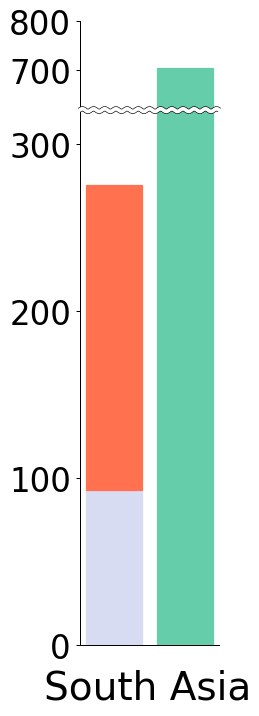

In [100]:
import matplotlib.patches as mpatches
from matplotlib.path import Path

######################################################
# pandas dfを保存
#####################################################
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
updown_path = f'{h08dir}/wsi/dat/availablewater/updown_availability.txt'
potential_path = f'{h08dir}/wsi/dat/potential/updown_potential.txt'
load_path = potential_path

df_updown = pd.read_csv(load_path, delimiter='|', header=None)
df_updown.columns = df_updown.iloc[0]
df_updown = df_updown[1:].reset_index(drop=True)
df_updown = df_updown.infer_objects()
float_lst = ['rate', 'wup', 'pop', 'ava', 'mpcy', 'potential']
for col in float_lst:
    df_updown[col] = pd.to_numeric(df_updown[col], errors='coerce')

# total population
region_counts = df_updown['12region'].value_counts()
pop_sum = df_updown.groupby('12region')['pop'].sum().reset_index()
estimated_sorted = pop_sum.sort_values(by='pop', ascending=False)

# stressed population
filtered_df = df_updown[df_updown['mpcy'] < 1000]
stressed_pop = filtered_df.groupby('12region')['pop'].sum().reset_index()
stressed_sorted = stressed_pop.sort_values(by='pop', ascending=False)

# potential
ava_df = df_updown.copy()
ava_df['potential_pop'] = ava_df['potential']/2500
pot_pop = ava_df.groupby('12region')['potential_pop'].sum().reset_index()
pot_sorted = pot_pop.sort_values(by='potential_pop', ascending=False)

region_lst = ['Central America', 
              'East Asia', 
              'Middle East', 
              'Northern Africa', 
              'Southeast Asia', 
              'North America', 
              'Southern Africa', 
              'South America', 
              'West Europe', 
              'Eastern Europe & Central Asia', 
              'Australia/Pacific', 
              'South Asia']

def bar_plot(key):
    plt.rcParams.update({'font.size': 26})
    fig, ax = plt.subplots(nrows=2, figsize=(2,9), dpi=90, sharex='col',
                           gridspec_kw={'height_ratios': (1,6)} )
    
    total = estimated_sorted[estimated_sorted['12region'] == key]['pop'].astype(float)
    stress = stressed_sorted[stressed_sorted['12region'] == key]['pop'].astype(float)
    potential = pot_sorted[pot_sorted['12region'] == key]['potential_pop'].astype(float)
    
    # Categories and positions
    categories = ['Total\nPopulation', 'Potential\nPopulation']
    positions1 = [0]  # Position for the first set of bars
    positions2 = [1]  # Position for the second set of bars
    
    # Values for the bars
    y1 = [total.sum() - stress.sum()]
    y2 = [stress.sum()]
    y3 = [potential.sum()]
    
    y1 = [i/1e6 for i in y1]
    y2 = [i/1e6 for i in y2]
    y3 = [i/1e6 for i in y3]
    
    width=0.8
    nonshr_color = '#d7dcf3'
    shr_color = '#ff714f'
    pot_color = 'mediumaquamarine'
    
    nonshr_facecolor='none'
    shr_facecolor='none'
    pot_facecolor='none'
    
    nonshr_facecolor = '#d7dcf3'
    shr_facecolor = '#ff714f'
    pot_facecolor = 'mediumaquamarine'
    
    # Plot the bars
    # 下段
    ax[1].bar(positions1, y1, width=width, edgecolor=nonshr_color, facecolor=nonshr_facecolor, label='Population without shortage')
    ax[1].bar(positions1, y2, bottom=y1, width=width, edgecolor=shr_color, facecolor=shr_facecolor, label='Population under shortage')
    ax[1].bar(positions2, y3, width=width, edgecolor=pot_color, facecolor=pot_facecolor, label='Potential Population')
    # 上段
    ax[0].bar(positions1, y1, width=width, edgecolor=nonshr_color, facecolor=nonshr_facecolor, label='Population without shortage')
    ax[0].bar(positions1, y2, bottom=y1, width=width, edgecolor=shr_color, facecolor=shr_facecolor, label='Population under shortage')
    ax[0].bar(positions2, y3, width=width, edgecolor=pot_color, facecolor=pot_facecolor, label='Potential Population')
    
    fig.subplots_adjust(hspace=0.0)  
    # Set the x-ticks and labels
    ax[1].set_xticks(positions1 + positions2, categories)
    ax[1].set_xticks([])
    ax[1].set_ylim(0, 320)  # 区間幅 400
    ax[1].set_yticks((0, 100, 200, 300))
    
    # 上段サブプロット
    ax[0].set_ylim(620,800)  # 区間幅 200
    ax[0].set_yticks((700, 800))
    
    # 下段のプロット領域上辺を非表示
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    
    # 上段のプロット領域底辺を非表示、X軸の目盛とラベルを非表示
    ax[0].spines['bottom'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False) 
    d1 = 0.001 # X軸のはみだし量
    d2 = 0.005 # ニョロ波の高さ
    wn = 51   # ニョロ波の数（奇数値を指定）
    
    pp = (0,d2,0,-d2)
    px = np.linspace(-d1,1+d1,wn)
    py = np.array([1+pp[i%4] for i in range(0,wn)])
    p = Path(list(zip(px,py)), [Path.MOVETO]+[Path.CURVE3]*(wn-1))
    
    line1 = mpatches.PathPatch(p, lw=4, edgecolor='black',
                              facecolor='None', clip_on=False,
                              transform=ax[1].transAxes, zorder=10)
    
    line2 = mpatches.PathPatch(p,lw=3, edgecolor='white',
                               facecolor='None', clip_on=False,
                               transform=ax[1].transAxes, zorder=10,
                               capstyle='round')
    
    a = ax[1].add_patch(line1)
    a = ax[1].add_patch(line2)
    
    # Labels and title
    #plt.xlabel('Category')
    #ax[0].set_ylabel('millions')
    #ax[0].yaxis.set_label_coords(0.2, 0.65) 
    if key == 'Eastern Europe & Central Asia':
        key = 'Eastern Europe'
    elif key == 'Eastern Europe & Central Asia':
        key = 'Oceania'
    #ax[0].set_title(f'{key}', pad=20)
    fig.suptitle(f'{key}', y=0.08)
    #plt.legend()
    
    # Show the plot
    plt.show()

bar_plot('South Asia')

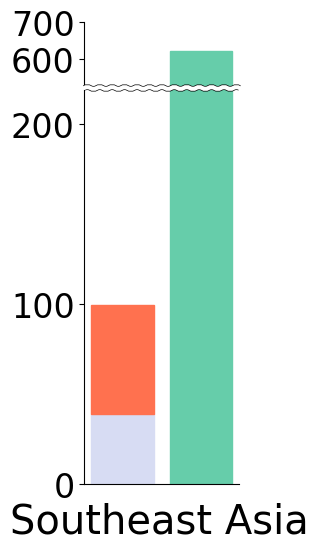

In [114]:
import matplotlib.patches as mpatches
from matplotlib.path import Path

######################################################
# pandas dfを保存
#####################################################
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
updown_path = f'{h08dir}/wsi/dat/availablewater/updown_availability.txt'
potential_path = f'{h08dir}/wsi/dat/potential/updown_potential.txt'
load_path = potential_path

df_updown = pd.read_csv(load_path, delimiter='|', header=None)
df_updown.columns = df_updown.iloc[0]
df_updown = df_updown[1:].reset_index(drop=True)
df_updown = df_updown.infer_objects()
float_lst = ['rate', 'wup', 'pop', 'ava', 'mpcy', 'potential']
for col in float_lst:
    df_updown[col] = pd.to_numeric(df_updown[col], errors='coerce')

# total population
region_counts = df_updown['12region'].value_counts()
pop_sum = df_updown.groupby('12region')['pop'].sum().reset_index()
estimated_sorted = pop_sum.sort_values(by='pop', ascending=False)

# stressed population
filtered_df = df_updown[df_updown['mpcy'] < 1000]
stressed_pop = filtered_df.groupby('12region')['pop'].sum().reset_index()
stressed_sorted = stressed_pop.sort_values(by='pop', ascending=False)

# potential
ava_df = df_updown.copy()
ava_df['potential_pop'] = ava_df['potential']/2500
pot_pop = ava_df.groupby('12region')['potential_pop'].sum().reset_index()
pot_sorted = pot_pop.sort_values(by='potential_pop', ascending=False)

region_lst = ['Central America', 
              'East Asia', 
              'Middle East', 
              'Northern Africa', 
              'Southeast Asia', 
              'North America', 
              'Southern Africa', 
              'South America', 
              'West Europe', 
              'Eastern Europe & Central Asia', 
              'Australia/Pacific', 
              'South Asia']

def bar_plot(key):
    plt.rcParams.update({'font.size': 24})
    fig, ax = plt.subplots(nrows=2, figsize=(2,6), dpi=100, sharex='col',
                           gridspec_kw={'height_ratios': (1,6)} )
    
    total = estimated_sorted[estimated_sorted['12region'] == key]['pop'].astype(float)
    stress = stressed_sorted[stressed_sorted['12region'] == key]['pop'].astype(float)
    potential = pot_sorted[pot_sorted['12region'] == key]['potential_pop'].astype(float)
    
    # Categories and positions
    categories = ['Total\nPopulation', 'Potential\nPopulation']
    positions1 = [0]  # Position for the first set of bars
    positions2 = [1]  # Position for the second set of bars
    
    # Values for the bars
    y1 = [total.sum() - stress.sum()]
    y2 = [stress.sum()]
    y3 = [potential.sum()]
    
    y1 = [i/1e6 for i in y1]
    y2 = [i/1e6 for i in y2]
    y3 = [i/1e6 for i in y3]
    
    width=0.8
    nonshr_color = '#d7dcf3'
    shr_color = '#ff714f'
    pot_color = 'mediumaquamarine'
    
    nonshr_facecolor='none'
    shr_facecolor='none'
    pot_facecolor='none'
    
    nonshr_facecolor = '#d7dcf3'
    shr_facecolor = '#ff714f'
    pot_facecolor = 'mediumaquamarine'
    
    # Plot the bars
    # 下段
    ax[1].bar(positions1, y1, width=width, edgecolor=nonshr_color, facecolor=nonshr_facecolor, label='Population without shortage')
    ax[1].bar(positions1, y2, bottom=y1, width=width, edgecolor=shr_color, facecolor=shr_facecolor, label='Population under shortage')
    ax[1].bar(positions2, y3, width=width, edgecolor=pot_color, facecolor=pot_facecolor, label='Potential Population')
    # 上段
    ax[0].bar(positions1, y1, width=width, edgecolor=nonshr_color, facecolor=nonshr_facecolor, label='Population without shortage')
    ax[0].bar(positions1, y2, bottom=y1, width=width, edgecolor=shr_color, facecolor=shr_facecolor, label='Population under shortage')
    ax[0].bar(positions2, y3, width=width, edgecolor=pot_color, facecolor=pot_facecolor, label='Potential Population')
    
    fig.subplots_adjust(hspace=0.0)  
    # Set the x-ticks and labels
    ax[1].set_xticks(positions1 + positions2, categories)
    ax[1].set_xticks([])
    ax[1].set_ylim(0, 220)  # 区間幅 400
    ax[1].set_yticks((0, 100, 200))
    
    # 上段サブプロット
    ax[0].set_ylim(520,700)  # 区間幅 200
    ax[0].set_yticks((600, 700))
    
    # 下段のプロット領域上辺を非表示
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    
    # 上段のプロット領域底辺を非表示、X軸の目盛とラベルを非表示
    ax[0].spines['bottom'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False) 
    d1 = 0.001 # X軸のはみだし量
    d2 = 0.005 # ニョロ波の高さ
    wn = 51   # ニョロ波の数（奇数値を指定）
    
    pp = (0,d2,0,-d2)
    px = np.linspace(-d1,1+d1,wn)
    py = np.array([1+pp[i%4] for i in range(0,wn)])
    p = Path(list(zip(px,py)), [Path.MOVETO]+[Path.CURVE3]*(wn-1))
    
    line1 = mpatches.PathPatch(p, lw=4, edgecolor='black',
                              facecolor='None', clip_on=False,
                              transform=ax[1].transAxes, zorder=10)
    
    line2 = mpatches.PathPatch(p,lw=3, edgecolor='white',
                               facecolor='None', clip_on=False,
                               transform=ax[1].transAxes, zorder=10,
                               capstyle='round')
    
    a = ax[1].add_patch(line1)
    a = ax[1].add_patch(line2)
    
    # Labels and title
    #plt.xlabel('Category')
    #ax[0].set_ylabel('millions')
    #ax[0].yaxis.set_label_coords(0.2, 0.65) 
    if key == 'Eastern Europe & Central Asia':
        key = 'Eastern Europe'
    elif key == 'Eastern Europe & Central Asia':
        key = 'Oceania'
    #ax[0].set_title(f'{key}', pad=20)
    fig.suptitle(f'{key}', y=0.08)
    #plt.legend()
    
    # Show the plot
    plt.show()

bar_plot('Southeast Asia')

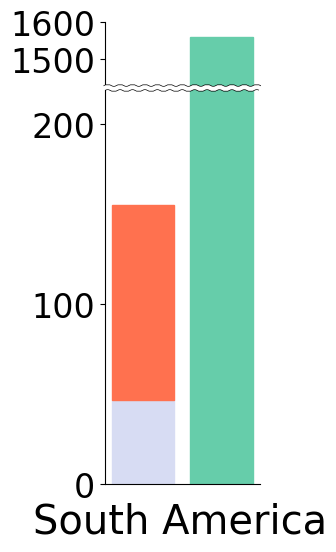

In [116]:
import matplotlib.patches as mpatches
from matplotlib.path import Path

######################################################
# pandas dfを保存
#####################################################
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
updown_path = f'{h08dir}/wsi/dat/availablewater/updown_availability.txt'
potential_path = f'{h08dir}/wsi/dat/potential/updown_potential.txt'
load_path = potential_path

df_updown = pd.read_csv(load_path, delimiter='|', header=None)
df_updown.columns = df_updown.iloc[0]
df_updown = df_updown[1:].reset_index(drop=True)
df_updown = df_updown.infer_objects()
float_lst = ['rate', 'wup', 'pop', 'ava', 'mpcy', 'potential']
for col in float_lst:
    df_updown[col] = pd.to_numeric(df_updown[col], errors='coerce')

# total population
region_counts = df_updown['12region'].value_counts()
pop_sum = df_updown.groupby('12region')['pop'].sum().reset_index()
estimated_sorted = pop_sum.sort_values(by='pop', ascending=False)

# stressed population
filtered_df = df_updown[df_updown['mpcy'] < 1000]
stressed_pop = filtered_df.groupby('12region')['pop'].sum().reset_index()
stressed_sorted = stressed_pop.sort_values(by='pop', ascending=False)

# potential
ava_df = df_updown.copy()
ava_df['potential_pop'] = ava_df['potential']/2500
pot_pop = ava_df.groupby('12region')['potential_pop'].sum().reset_index()
pot_sorted = pot_pop.sort_values(by='potential_pop', ascending=False)

region_lst = ['Central America', 
              'East Asia', 
              'Middle East', 
              'Northern Africa', 
              'Southeast Asia', 
              'North America', 
              'Southern Africa', 
              'South America', 
              'West Europe', 
              'Eastern Europe & Central Asia', 
              'Australia/Pacific', 
              'South Asia']

def bar_plot(key):
    plt.rcParams.update({'font.size': 24})
    fig, ax = plt.subplots(nrows=2, figsize=(2,6), dpi=100, sharex='col',
                           gridspec_kw={'height_ratios': (1,6)} )
    
    total = estimated_sorted[estimated_sorted['12region'] == key]['pop'].astype(float)
    stress = stressed_sorted[stressed_sorted['12region'] == key]['pop'].astype(float)
    potential = pot_sorted[pot_sorted['12region'] == key]['potential_pop'].astype(float)
    
    # Categories and positions
    categories = ['Total\nPopulation', 'Potential\nPopulation']
    positions1 = [0]  # Position for the first set of bars
    positions2 = [1]  # Position for the second set of bars
    
    # Values for the bars
    y1 = [total.sum() - stress.sum()]
    y2 = [stress.sum()]
    y3 = [potential.sum()]
    
    y1 = [i/1e6 for i in y1]
    y2 = [i/1e6 for i in y2]
    y3 = [i/1e6 for i in y3]
    
    width=0.8
    nonshr_color = '#d7dcf3'
    shr_color = '#ff714f'
    pot_color = 'mediumaquamarine'
    
    nonshr_facecolor='none'
    shr_facecolor='none'
    pot_facecolor='none'
    
    nonshr_facecolor = '#d7dcf3'
    shr_facecolor = '#ff714f'
    pot_facecolor = 'mediumaquamarine'
    
    # Plot the bars
    # 下段
    ax[1].bar(positions1, y1, width=width, edgecolor=nonshr_color, facecolor=nonshr_facecolor, label='Population without shortage')
    ax[1].bar(positions1, y2, bottom=y1, width=width, edgecolor=shr_color, facecolor=shr_facecolor, label='Population under shortage')
    ax[1].bar(positions2, y3, width=width, edgecolor=pot_color, facecolor=pot_facecolor, label='Potential Population')
    # 上段
    ax[0].bar(positions1, y1, width=width, edgecolor=nonshr_color, facecolor=nonshr_facecolor, label='Population without shortage')
    ax[0].bar(positions1, y2, bottom=y1, width=width, edgecolor=shr_color, facecolor=shr_facecolor, label='Population under shortage')
    ax[0].bar(positions2, y3, width=width, edgecolor=pot_color, facecolor=pot_facecolor, label='Potential Population')
    
    fig.subplots_adjust(hspace=0.0)  
    # Set the x-ticks and labels
    ax[1].set_xticks(positions1 + positions2, categories)
    ax[1].set_xticks([])
    ax[1].set_ylim(0, 220)  # 区間幅 400
    ax[1].set_yticks((0, 100, 200))
    
    # 上段サブプロット
    ax[0].set_ylim(1420,1600)  # 区間幅 200
    ax[0].set_yticks((1500, 1600))
    
    # 下段のプロット領域上辺を非表示
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    
    # 上段のプロット領域底辺を非表示、X軸の目盛とラベルを非表示
    ax[0].spines['bottom'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False) 
    d1 = 0.001 # X軸のはみだし量
    d2 = 0.005 # ニョロ波の高さ
    wn = 51   # ニョロ波の数（奇数値を指定）
    
    pp = (0,d2,0,-d2)
    px = np.linspace(-d1,1+d1,wn)
    py = np.array([1+pp[i%4] for i in range(0,wn)])
    p = Path(list(zip(px,py)), [Path.MOVETO]+[Path.CURVE3]*(wn-1))
    
    line1 = mpatches.PathPatch(p, lw=4, edgecolor='black',
                              facecolor='None', clip_on=False,
                              transform=ax[1].transAxes, zorder=10)
    
    line2 = mpatches.PathPatch(p,lw=3, edgecolor='white',
                               facecolor='None', clip_on=False,
                               transform=ax[1].transAxes, zorder=10,
                               capstyle='round')
    
    a = ax[1].add_patch(line1)
    a = ax[1].add_patch(line2)
    
    # Labels and title
    #plt.xlabel('Category')
    #ax[0].set_ylabel('millions')
    #ax[0].yaxis.set_label_coords(0.2, 0.65) 
    if key == 'Eastern Europe & Central Asia':
        key = 'Eastern Europe'
    elif key == 'Eastern Europe & Central Asia':
        key = 'Oceania'
    #ax[0].set_title(f'{key}', pad=20)
    fig.suptitle(f'{key}', y=0.08)
    #plt.legend()
    
    # Show the plot
    plt.show()

bar_plot('South America')

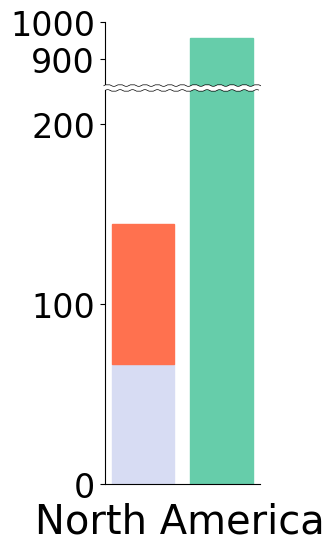

In [118]:
import matplotlib.patches as mpatches
from matplotlib.path import Path

######################################################
# pandas dfを保存
#####################################################
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
updown_path = f'{h08dir}/wsi/dat/availablewater/updown_availability.txt'
potential_path = f'{h08dir}/wsi/dat/potential/updown_potential.txt'
load_path = potential_path

df_updown = pd.read_csv(load_path, delimiter='|', header=None)
df_updown.columns = df_updown.iloc[0]
df_updown = df_updown[1:].reset_index(drop=True)
df_updown = df_updown.infer_objects()
float_lst = ['rate', 'wup', 'pop', 'ava', 'mpcy', 'potential']
for col in float_lst:
    df_updown[col] = pd.to_numeric(df_updown[col], errors='coerce')

# total population
region_counts = df_updown['12region'].value_counts()
pop_sum = df_updown.groupby('12region')['pop'].sum().reset_index()
estimated_sorted = pop_sum.sort_values(by='pop', ascending=False)

# stressed population
filtered_df = df_updown[df_updown['mpcy'] < 1000]
stressed_pop = filtered_df.groupby('12region')['pop'].sum().reset_index()
stressed_sorted = stressed_pop.sort_values(by='pop', ascending=False)

# potential
ava_df = df_updown.copy()
ava_df['potential_pop'] = ava_df['potential']/2500
pot_pop = ava_df.groupby('12region')['potential_pop'].sum().reset_index()
pot_sorted = pot_pop.sort_values(by='potential_pop', ascending=False)

region_lst = ['Central America', 
              'East Asia', 
              'Middle East', 
              'Northern Africa', 
              'Southeast Asia', 
              'North America', 
              'Southern Africa', 
              'South America', 
              'West Europe', 
              'Eastern Europe & Central Asia', 
              'Australia/Pacific', 
              'South Asia']

def bar_plot(key):
    plt.rcParams.update({'font.size': 24})
    fig, ax = plt.subplots(nrows=2, figsize=(2,6), dpi=100, sharex='col',
                           gridspec_kw={'height_ratios': (1,6)} )
    
    total = estimated_sorted[estimated_sorted['12region'] == key]['pop'].astype(float)
    stress = stressed_sorted[stressed_sorted['12region'] == key]['pop'].astype(float)
    potential = pot_sorted[pot_sorted['12region'] == key]['potential_pop'].astype(float)
    
    # Categories and positions
    categories = ['Total\nPopulation', 'Potential\nPopulation']
    positions1 = [0]  # Position for the first set of bars
    positions2 = [1]  # Position for the second set of bars
    
    # Values for the bars
    y1 = [total.sum() - stress.sum()]
    y2 = [stress.sum()]
    y3 = [potential.sum()]
    
    y1 = [i/1e6 for i in y1]
    y2 = [i/1e6 for i in y2]
    y3 = [i/1e6 for i in y3]
    
    width=0.8
    nonshr_color = '#d7dcf3'
    shr_color = '#ff714f'
    pot_color = 'mediumaquamarine'
    
    nonshr_facecolor='none'
    shr_facecolor='none'
    pot_facecolor='none'
    
    nonshr_facecolor = '#d7dcf3'
    shr_facecolor = '#ff714f'
    pot_facecolor = 'mediumaquamarine'
    
    # Plot the bars
    # 下段
    ax[1].bar(positions1, y1, width=width, edgecolor=nonshr_color, facecolor=nonshr_facecolor, label='Population without shortage')
    ax[1].bar(positions1, y2, bottom=y1, width=width, edgecolor=shr_color, facecolor=shr_facecolor, label='Population under shortage')
    ax[1].bar(positions2, y3, width=width, edgecolor=pot_color, facecolor=pot_facecolor, label='Potential Population')
    # 上段
    ax[0].bar(positions1, y1, width=width, edgecolor=nonshr_color, facecolor=nonshr_facecolor, label='Population without shortage')
    ax[0].bar(positions1, y2, bottom=y1, width=width, edgecolor=shr_color, facecolor=shr_facecolor, label='Population under shortage')
    ax[0].bar(positions2, y3, width=width, edgecolor=pot_color, facecolor=pot_facecolor, label='Potential Population')
    
    fig.subplots_adjust(hspace=0.0)  
    # Set the x-ticks and labels
    ax[1].set_xticks(positions1 + positions2, categories)
    ax[1].set_xticks([])
    ax[1].set_ylim(0, 220)  # 区間幅 400
    ax[1].set_yticks((0, 100, 200))
    
    # 上段サブプロット
    ax[0].set_ylim(820,1000)  # 区間幅 200
    ax[0].set_yticks((900, 1000))
    
    # 下段のプロット領域上辺を非表示
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    
    # 上段のプロット領域底辺を非表示、X軸の目盛とラベルを非表示
    ax[0].spines['bottom'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False) 
    d1 = 0.001 # X軸のはみだし量
    d2 = 0.005 # ニョロ波の高さ
    wn = 51   # ニョロ波の数（奇数値を指定）
    
    pp = (0,d2,0,-d2)
    px = np.linspace(-d1,1+d1,wn)
    py = np.array([1+pp[i%4] for i in range(0,wn)])
    p = Path(list(zip(px,py)), [Path.MOVETO]+[Path.CURVE3]*(wn-1))
    
    line1 = mpatches.PathPatch(p, lw=4, edgecolor='black',
                              facecolor='None', clip_on=False,
                              transform=ax[1].transAxes, zorder=10)
    
    line2 = mpatches.PathPatch(p,lw=3, edgecolor='white',
                               facecolor='None', clip_on=False,
                               transform=ax[1].transAxes, zorder=10,
                               capstyle='round')
    
    a = ax[1].add_patch(line1)
    a = ax[1].add_patch(line2)
    
    # Labels and title
    #plt.xlabel('Category')
    #ax[0].set_ylabel('millions')
    #ax[0].yaxis.set_label_coords(0.2, 0.65) 
    if key == 'Eastern Europe & Central Asia':
        key = 'Eastern Europe'
    elif key == 'Eastern Europe & Central Asia':
        key = 'Oceania'
    #ax[0].set_title(f'{key}', pad=20)
    fig.suptitle(f'{key}', y=0.08)
    #plt.legend()
    
    # Show the plot
    plt.show()

bar_plot('North America')

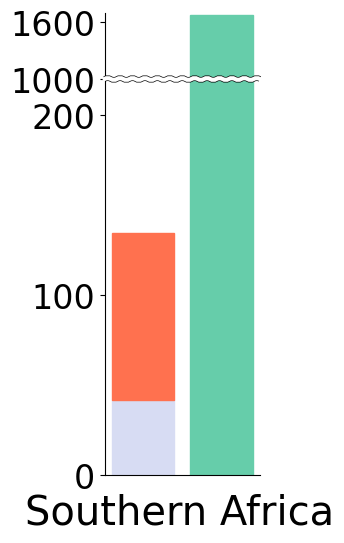

In [142]:
import matplotlib.patches as mpatches
from matplotlib.path import Path

######################################################
# pandas dfを保存
#####################################################
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
updown_path = f'{h08dir}/wsi/dat/availablewater/updown_availability.txt'
potential_path = f'{h08dir}/wsi/dat/potential/updown_potential.txt'
load_path = potential_path

df_updown = pd.read_csv(load_path, delimiter='|', header=None)
df_updown.columns = df_updown.iloc[0]
df_updown = df_updown[1:].reset_index(drop=True)
df_updown = df_updown.infer_objects()
float_lst = ['rate', 'wup', 'pop', 'ava', 'mpcy', 'potential']
for col in float_lst:
    df_updown[col] = pd.to_numeric(df_updown[col], errors='coerce')

# total population
region_counts = df_updown['12region'].value_counts()
pop_sum = df_updown.groupby('12region')['pop'].sum().reset_index()
estimated_sorted = pop_sum.sort_values(by='pop', ascending=False)

# stressed population
filtered_df = df_updown[df_updown['mpcy'] < 1000]
stressed_pop = filtered_df.groupby('12region')['pop'].sum().reset_index()
stressed_sorted = stressed_pop.sort_values(by='pop', ascending=False)

# potential
ava_df = df_updown.copy()
ava_df['potential_pop'] = ava_df['potential']/2500
pot_pop = ava_df.groupby('12region')['potential_pop'].sum().reset_index()
pot_sorted = pot_pop.sort_values(by='potential_pop', ascending=False)

region_lst = ['Central America', 
              'East Asia', 
              'Middle East', 
              'Northern Africa', 
              'Southeast Asia', 
              'North America', 
              'Southern Africa', 
              'South America', 
              'West Europe', 
              'Eastern Europe & Central Asia', 
              'Australia/Pacific', 
              'South Asia']

def bar_plot(key):
    plt.rcParams.update({'font.size': 24})
    fig, ax = plt.subplots(nrows=2, figsize=(2,6), dpi=100, sharex='col',
                           gridspec_kw={'height_ratios': (1,6)} )
    
    total = estimated_sorted[estimated_sorted['12region'] == key]['pop'].astype(float)
    stress = stressed_sorted[stressed_sorted['12region'] == key]['pop'].astype(float)
    potential = pot_sorted[pot_sorted['12region'] == key]['potential_pop'].astype(float)
    
    # Categories and positions
    categories = ['Total\nPopulation', 'Potential\nPopulation']
    positions1 = [0]  # Position for the first set of bars
    positions2 = [1]  # Position for the second set of bars
    
    # Values for the bars
    y1 = [total.sum() - stress.sum()]
    y2 = [stress.sum()]
    y3 = [potential.sum()]
    
    y1 = [i/1e6 for i in y1]
    y2 = [i/1e6 for i in y2]
    y3 = [i/1e6 for i in y3]
    
    width=0.8
    nonshr_color = '#d7dcf3'
    shr_color = '#ff714f'
    pot_color = 'mediumaquamarine'
    
    nonshr_facecolor='none'
    shr_facecolor='none'
    pot_facecolor='none'
    
    nonshr_facecolor = '#d7dcf3'
    shr_facecolor = '#ff714f'
    pot_facecolor = 'mediumaquamarine'
    
    # Plot the bars
    # 下段
    ax[1].bar(positions1, y1, width=width, edgecolor=nonshr_color, facecolor=nonshr_facecolor, label='Population without shortage')
    ax[1].bar(positions1, y2, bottom=y1, width=width, edgecolor=shr_color, facecolor=shr_facecolor, label='Population under shortage')
    ax[1].bar(positions2, y3, width=width, edgecolor=pot_color, facecolor=pot_facecolor, label='Potential Population')
    # 上段
    ax[0].bar(positions1, y1, width=width, edgecolor=nonshr_color, facecolor=nonshr_facecolor, label='Population without shortage')
    ax[0].bar(positions1, y2, bottom=y1, width=width, edgecolor=shr_color, facecolor=shr_facecolor, label='Population under shortage')
    ax[0].bar(positions2, y3, width=width, edgecolor=pot_color, facecolor=pot_facecolor, label='Potential Population')
    
    fig.subplots_adjust(hspace=0.0)  
    # Set the x-ticks and labels
    ax[1].set_xticks(positions1 + positions2, categories)
    ax[1].set_xticks([])
    ax[1].set_ylim(0, 220)  # 区間幅 400
    ax[1].set_yticks((0, 100, 200))
    
    # 上段サブプロット
    ax[0].set_ylim(1520,1700)  # 区間幅 200
    ax[0].set_yticks((1600, 1000))
    
    # 下段のプロット領域上辺を非表示
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    
    # 上段のプロット領域底辺を非表示、X軸の目盛とラベルを非表示
    ax[0].spines['bottom'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False) 
    d1 = 0.001 # X軸のはみだし量
    d2 = 0.005 # ニョロ波の高さ
    wn = 51   # ニョロ波の数（奇数値を指定）
    
    pp = (0,d2,0,-d2)
    px = np.linspace(-d1,1+d1,wn)
    py = np.array([1+pp[i%4] for i in range(0,wn)])
    p = Path(list(zip(px,py)), [Path.MOVETO]+[Path.CURVE3]*(wn-1))
    
    line1 = mpatches.PathPatch(p, lw=4, edgecolor='black',
                              facecolor='None', clip_on=False,
                              transform=ax[1].transAxes, zorder=10)
    
    line2 = mpatches.PathPatch(p,lw=3, edgecolor='white',
                               facecolor='None', clip_on=False,
                               transform=ax[1].transAxes, zorder=10,
                               capstyle='round')
    
    a = ax[1].add_patch(line1)
    a = ax[1].add_patch(line2)
    
    # Labels and title
    #plt.xlabel('Category')
    #ax[0].set_ylabel('millions')
    #ax[0].yaxis.set_label_coords(0.2, 0.65) 
    if key == 'Eastern Europe & Central Asia':
        key = 'Eastern Europe'
    elif key == 'Eastern Europe & Central Asia':
        key = 'Oceania'
    #ax[0].set_title(f'{key}', pad=20)
    fig.suptitle(f'{key}', y=0.08)
    #plt.legend()
    
    # Show the plot
    plt.show()

bar_plot('Southern Africa')

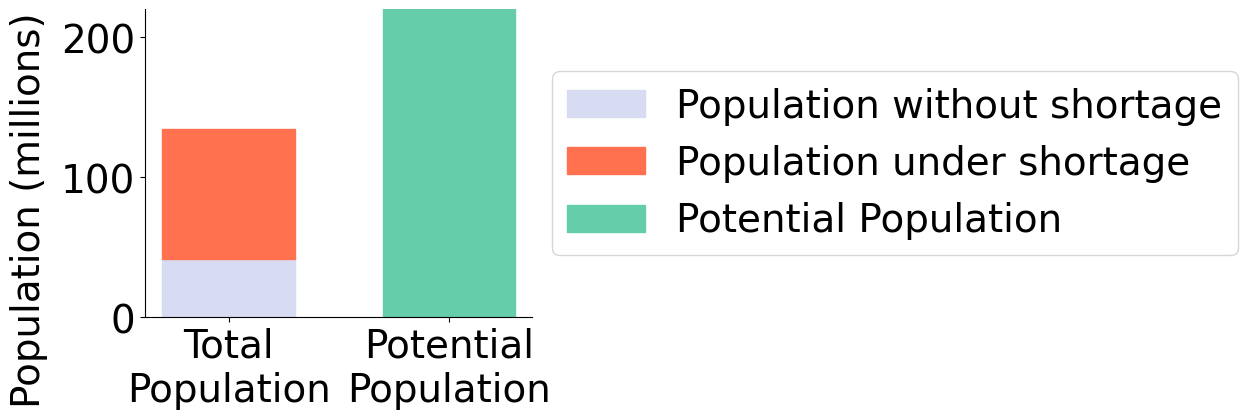

In [141]:
import matplotlib.patches as mpatches
from matplotlib.path import Path

######################################################
# pandas dfを保存
#####################################################
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
updown_path = f'{h08dir}/wsi/dat/availablewater/updown_availability.txt'
potential_path = f'{h08dir}/wsi/dat/potential/updown_potential.txt'
load_path = potential_path

df_updown = pd.read_csv(load_path, delimiter='|', header=None)
df_updown.columns = df_updown.iloc[0]
df_updown = df_updown[1:].reset_index(drop=True)
df_updown = df_updown.infer_objects()
float_lst = ['rate', 'wup', 'pop', 'ava', 'mpcy', 'potential']
for col in float_lst:
    df_updown[col] = pd.to_numeric(df_updown[col], errors='coerce')

# total population
region_counts = df_updown['12region'].value_counts()
pop_sum = df_updown.groupby('12region')['pop'].sum().reset_index()
estimated_sorted = pop_sum.sort_values(by='pop', ascending=False)

# stressed population
filtered_df = df_updown[df_updown['mpcy'] < 1000]
stressed_pop = filtered_df.groupby('12region')['pop'].sum().reset_index()
stressed_sorted = stressed_pop.sort_values(by='pop', ascending=False)

# potential
ava_df = df_updown.copy()
ava_df['potential_pop'] = ava_df['potential']/2500
pot_pop = ava_df.groupby('12region')['potential_pop'].sum().reset_index()
pot_sorted = pot_pop.sort_values(by='potential_pop', ascending=False)

region_lst = ['Central America', 
              'East Asia', 
              'Middle East', 
              'Northern Africa', 
              'Southeast Asia', 
              'North America', 
              'Southern Africa', 
              'South America', 
              'West Europe', 
              'Eastern Europe & Central Asia', 
              'Australia/Pacific', 
              'South Asia']

def bar_plot(key):
    plt.rcParams.update({'font.size': 28})
    fig, ax = plt.subplots(figsize=(5,4))
    
    total = estimated_sorted[estimated_sorted['12region'] == key]['pop'].astype(float)
    stress = stressed_sorted[stressed_sorted['12region'] == key]['pop'].astype(float)
    potential = pot_sorted[pot_sorted['12region'] == key]['potential_pop'].astype(float)
    
    # Categories and positions
    categories = ['Total\nPopulation', 'Potential\nPopulation']
    positions1 = [0]  # Position for the first set of bars
    positions2 = [1]  # Position for the second set of bars
    
    # Values for the bars
    y1 = [total.sum() - stress.sum()]
    y2 = [stress.sum()]
    y3 = [potential.sum()]
    
    y1 = [i/1e6 for i in y1]
    y2 = [i/1e6 for i in y2]
    y3 = [i/1e6 for i in y3]
    
    width=0.6
    nonshr_color = '#d7dcf3'
    shr_color = '#ff714f'
    pot_color = 'mediumaquamarine'
    
    nonshr_facecolor='none'
    shr_facecolor='none'
    pot_facecolor='none'
    
    nonshr_facecolor = '#d7dcf3'
    shr_facecolor = '#ff714f'
    pot_facecolor = 'mediumaquamarine'
    
    # Plot the bars
    ax.bar(positions1, y1, width=width, edgecolor=nonshr_color, facecolor=nonshr_facecolor, label='Population without shortage')
    ax.bar(positions1, y2, bottom=y1, width=width, edgecolor=shr_color, facecolor=shr_facecolor, label='Population under shortage')
    ax.bar(positions2, y3, width=width, edgecolor=pot_color, facecolor=pot_facecolor, label='Potential Population')
    
    fig.subplots_adjust(hspace=0.0)  
    # Set the x-ticks and labels
    ax.set_xticks(positions1 + positions2, categories)
    ax.set_ylim(0, 220)  # 区間幅 400
    ax.set_yticks((0, 100, 200))
    
    # 下段のプロット領域上辺を非表示
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    wn = 51   # ニョロ波の数（奇数値を指定）
    
    
    # Labels and title
    #plt.xlabel('Category')
    ax.set_ylabel('Population (millions)')
    ax.yaxis.set_label_coords(-0.25, 0.35) 
    
    plt.legend()
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Show the plot
    plt.show()

bar_plot('Southern Africa')